In [2]:
import pandas as pd 
import numpy as np

In [3]:
dft=pd.read_csv(r"C:\Users\emads\OneDrive\Desktop\BCIT\4\AI\Project\dft.csv")

In [4]:
dft = dft.rename(columns={'Entry.time': 'date'})

dft['date']=pd.to_datetime(dft['date'])

dft['date'] = dft['date'].dt.date

In [5]:
del dft['Exit.time']
del dft['Exit.hour']
del dft['card_anon']
del dft['vehicle_anon']
del dft['company_anon']
del dft['#Trips']
del dft['#TaxiMonthlyTripsQuota']
del dft['#TaxiMonthlyTrips']
del dft['TripId']
del dft['Complete.trip']
del dft['Time.Since.Previous.Trip']
del dft['Record.Group.Exit']
del dft['Unnamed: 0']
dft = dft.rename(columns={'Dwell.Time': 'taximinwait'})

In [7]:
dft.head()

Record.Group.Entry        date  Entry.hour taximinwait
0           1657062.0  2023-01-04         0.0        4.43
1           1657081.0  2023-01-09        14.0        8.77
2           1657058.0  2023-01-03        20.0        2.75
3           1657063.0  2023-01-04         1.0       10.05
4           1657065.0  2023-01-04        12.0        1.38

In [8]:
dft["taximinwait"] = dft["taximinwait"].str.replace(",", "").astype(float)
dft_agg = dft.groupby(["date", "Entry.hour"]).agg({"taximinwait": "mean", "Entry.hour": "count"}).rename(columns={"Entry.hour": "count"}).reset_index()

In [9]:
dft_agg.head()

date  Entry.hour  taximinwait  count
0  2022-12-31         0.0    14.329252    108
1  2022-12-31         1.0     6.502151     97
2  2022-12-31         2.0     7.667391     24
3  2022-12-31         3.0     3.306667      3
4  2022-12-31         4.0    80.712222     10

In [10]:
dft_agg.to_csv('dftFinal_data.csv', index=False)

In [28]:
dfr=pd.read_csv(r"C:\Users\emads\OneDrive\Desktop\BCIT\4\AI\ridecut.csv")

In [29]:
dfr['PickupDepDT']=pd.to_datetime(dfr['PickupDepDT'])

dfr['date'] = dfr['PickupDepDT'].dt.date
dfr['Entry.hour'] = dfr['PickupDepDT'].dt.time

In [30]:
dfr = dfr.dropna(subset=['date'])
dfr.head()

Unnamed: 0                                TripID EventType  \
0         224  ef60f0db-09ae-4de6-9f0f-c4e2aa0fc16a    PickUp   
1         282  45bef1b2-5155-4c95-b8d6-efe7e5db2522    PickUp   
2         297  4b6e1cd9-ee13-45f0-be1e-750b6aa72efc    PickUp   
3         372  079ffcee-5039-4854-aaba-050b981382f0    PickUp   
4         426  cb2a8813-93bd-4787-a46d-2fe8c1d73850    PickUp   

          PickupDepDT  PickupLat  PickupLng DropoffDeptDT  DropoffLat  \
0 2023-01-22 22:07:43   49.19379 -123.18028           NaN         NaN   
1 2023-01-02 19:17:04   49.19382 -123.18012           NaN         NaN   
2 2023-01-26 01:16:44   49.19462 -123.17706           NaN         NaN   
3 2023-01-02 20:35:22   49.19465 -123.17731           NaN         NaN   
4 2023-01-15 23:38:06   49.19460 -123.17707           NaN         NaN   

   DropoffLng          Area VehRegNo_ANON        date Entry.hour  
0         NaN  YVR_Terminal        RS8794  2023-01-22   22:07:43  
1         NaN  YVR_Terminal        RS8794  2023-01-02   19:17:04  
2         NaN  YVR_Terminal        RS8794  2023-01-26   01:16:44  
3         NaN  YVR_Terminal        RS8794  2023-01-02   20:35:22  
4         NaN  YVR_Terminal        RS8794  2023-01-15   23:38:06

In [31]:
dfr.shape

(47396, 13)

In [38]:
dfr = dfr.loc[:, ["date", 'Entry.hour']]

In [44]:
dfr['hour'] = dfr['Entry.hour'].apply(lambda x: int(x.split(':')[0]))


In [46]:
del dfr['Entry.hour']
dfr = dfr.rename(columns={'hour': 'Entry.hour'})

In [47]:
dfr.head()

date  Entry.hour
0  2023-01-22          22
1  2023-01-02          19
2  2023-01-26           1
3  2023-01-02          20
4  2023-01-15          23

In [ ]:
#plz dont run
dfr = dfr.groupby(['date', 'Entry.hour']).size().reset_index(name='count')

In [49]:
dfr.head()

date  Entry.hour  count
0  2022-12-31           0     65
1  2022-12-31           1     78
2  2022-12-31           2     43
3  2022-12-31           3     19
4  2022-12-31           4      7

In [51]:
print(dft_agg.shape)
dfr.shape

(739, 4)


(735, 3)

In [52]:
dfr.to_csv('rideFinal_data.csv', index=False)

In [67]:
dfa=pd.read_csv(r"C:\Users\emads\OneDrive\Desktop\BCIT\4\AI\arrivalcut.csv")

In [68]:
del dfa['Leg']

In [72]:
dfa.head()

Date         Region Estimated 30 Min  Arr Pax
0  2022-12-31       Domestic         00:30:00      256
1  2022-12-31   Asia Pacific         05:00:00      247
2  2022-12-31  Latin America         05:00:00      158
3  2022-12-31   Asia Pacific         06:00:00      295
4  2022-12-31       Domestic         06:30:00      732

In [75]:
dfa['Entry.hour'] = dfa['Estimated 30 Min'].apply(lambda x: x.hour)


In [79]:
del dfa['Estimated 30 Min']
dfa.head(15)

Date         Region  Arr Pax  Entry.hour
0   2022-12-31       Domestic      256           0
1   2022-12-31   Asia Pacific      247           5
2   2022-12-31  Latin America      158           5
3   2022-12-31   Asia Pacific      295           6
4   2022-12-31       Domestic      732           6
5   2022-12-31   Asia Pacific      337           6
6   2022-12-31    Transborder      560           7
7   2022-12-31       Domestic      460           7
8   2022-12-31    Transborder      171           7
9   2022-12-31   Asia Pacific      702           7
10  2022-12-31       Domestic      714           7
11  2022-12-31   Asia Pacific      400           8
12  2022-12-31    Transborder      343           8
13  2022-12-31       Domestic       76           8
14  2022-12-31       Domestic      173           8

In [ ]:
#plz dont run
pivoted = pd.pivot_table(dfa, index=['Date', 'Entry.hour'], columns=['Region'], values=['Arr Pax'], aggfunc='sum')

In [89]:
pivoted.to_csv('arrivalcleaned.csv')

In [94]:
dft_agg.shape

(739, 4)

In [93]:
dfr.shape

(735, 3)

In [95]:
pivoted.shape

(677, 5)

In [97]:
dfr = dfr.rename(columns={'count': 'ride.count'})

In [130]:
dfaf=pd.read_csv(r"C:\Users\emads\arrivalcleaned.csv")

In [131]:
dfaf[['Asia Pacific', 'Domestic', 'Europe', 'Latin America', 'Transborder']] = dfaf[['Asia Pacific', 'Domestic', 'Europe', 'Latin America', 'Transborder']].fillna(0)


In [132]:
dfaf.head()

date  Entry.hour  Asia Pacific  Domestic  Europe  Latin America  \
0  2022-12-31           0           0.0     256.0     0.0            0.0   
1  2022-12-31           5         247.0       0.0     0.0          158.0   
2  2022-12-31           6         632.0     732.0     0.0            0.0   
3  2022-12-31           7         702.0    1174.0     0.0            0.0   
4  2022-12-31           8         400.0     249.0     0.0            0.0   

   Transborder  
0          0.0  
1          0.0  
2          0.0  
3        731.0  
4        343.0

In [113]:
merged = dft_agg.merge(dfr, on=['date', 'Entry.hour'], how='left')


In [181]:
merged.head(50)

date  Entry.hour  taximinwait  count  ride.count
0   2022-12-31         0.0    14.329252    108        65.0
1   2022-12-31         1.0     6.502151     97        78.0
2   2022-12-31         2.0     7.667391     24        43.0
3   2022-12-31         3.0     3.306667      3        19.0
4   2022-12-31         4.0    80.712222     10         7.0
5   2022-12-31         5.0    68.268750      8         8.0
6   2022-12-31         6.0    25.646000     15        25.0
7   2022-12-31         7.0     8.127500     72        51.0
8   2022-12-31         8.0    11.381818     59        59.0
9   2022-12-31         9.0    23.515789     38        53.0
10  2022-12-31        10.0     8.008289     78        61.0
11  2022-12-31        11.0     6.202286    107        76.0
12  2022-12-31        12.0     5.132362    128        69.0
13  2022-12-31        13.0     4.119940    174        89.0
14  2022-12-31        14.0     9.029875     84        72.0
15  2022-12-31        15.0     7.377912     94        69.0
16  2022-12-31        16.0     5.240928     97        48.0
17  2022-12-31        17.0     6.094052    120        80.0
18  2022-12-31        18.0     6.977654     82        64.0
19  2022-12-31        19.0     6.524343    104        71.0
20  2022-12-31        20.0     4.189548    160        60.0
21  2022-12-31        21.0    15.249685    134        51.0
22  2022-12-31        22.0     3.417677    158        57.0
23  2022-12-31        23.0     3.719712    147        78.0
24  2023-01-01         0.0     4.788252    103        67.0
25  2023-01-01         1.0     2.661053     99        26.0
26  2023-01-01         2.0     0.885000      6         3.0
27  2023-01-01         3.0     0.420000      1         3.0
28  2023-01-01         4.0    38.850000      1         4.0
29  2023-01-01         5.0    26.887500     16         6.0
30  2023-01-01         6.0    27.165926     29        15.0
31  2023-01-01         7.0    11.493333     47        53.0
32  2023-01-01         8.0    37.657273     24        17.0
33  2023-01-01         9.0    22.728462     26        51.0
34  2023-01-01        10.0    10.068169     73        74.0
35  2023-01-01        11.0     5.474953    110        79.0
36  2023-01-01        12.0     5.390692    134        95.0
37  2023-01-01        13.0     4.784044    144        76.0
38  2023-01-01        14.0    10.824242     69        65.0
39  2023-01-01        15.0    10.581803     65        63.0
40  2023-01-01        16.0     6.603291     82        54.0
41  2023-01-01        17.0     5.264673    109        81.0
42  2023-01-01        18.0    11.780357     57        44.0
43  2023-01-01        19.0     4.127519    138       104.0
44  2023-01-01        20.0     4.046142    132        94.0
45  2023-01-01        21.0    55.990935    146       124.0
46  2023-01-01        22.0     2.987901    174       127.0
47  2023-01-01        23.0     3.952374    143        73.0
48  2023-01-02         0.0     5.718617     99        55.0
49  2023-01-02         1.0     9.330851     48        33.0

In [119]:
merged.to_csv('YVR.csv', index=False)

In [154]:
start_date = dfaf['date'].min()
end_date = dfaf['date'].max()

# create a list of all possible date/hour combinations
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
date_hour = [(d.date(), d.hour) for d in date_range]

# check if each date/hour combination exists in the dataframe
for dh in date_hour:
    if not dfaf[(dfaf['date'] == dh[0]) & (dfaf['Entry.hour'] == dh[1])].empty:
        # if the row already exists, skip to the next one
        continue
    else:
        # if the row is missing, add a new row with NaN values
        new_row = {'date': dh[0], 'Entry.hour': dh[1], 'Asia Pacific': np.nan, 'Domestic': np.nan, 'Europe': np.nan, 'Latin America': np.nan, 'Transborder': np.nan}
        dfaf = dfaf.append(new_row, ignore_index=True)


C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Use

C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime

C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime

C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime

C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime

C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\1380785246.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfaf = dfaf.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime

In [163]:
dfaf.tail(50)

date  Entry.hour  Asia Pacific  Domestic  Europe  Latin America  \
716  2023-01-14           3           NaN       NaN     NaN            NaN   
717  2023-01-15           1           NaN       NaN     NaN            NaN   
718  2023-01-15           2           NaN       NaN     NaN            NaN   
719  2023-01-15           3           NaN       NaN     NaN            NaN   
720  2023-01-15           4           NaN       NaN     NaN            NaN   
721  2023-01-16           3           NaN       NaN     NaN            NaN   
722  2023-01-16           4           NaN       NaN     NaN            NaN   
723  2023-01-17           2           NaN       NaN     NaN            NaN   
724  2023-01-18           1           NaN       NaN     NaN            NaN   
725  2023-01-18           2           NaN       NaN     NaN            NaN   
726  2023-01-18           3           NaN       NaN     NaN            NaN   
727  2023-01-18           4           NaN       NaN     NaN            NaN   
728  2023-01-19           2           NaN       NaN     NaN            NaN   
729  2023-01-19           3           NaN       NaN     NaN            NaN   
730  2023-01-20           1           NaN       NaN     NaN            NaN   
731  2023-01-20           2           NaN       NaN     NaN            NaN   
732  2023-01-20           3           NaN       NaN     NaN            NaN   
733  2023-01-20           4           NaN       NaN     NaN            NaN   
734  2023-01-20           5           NaN       NaN     NaN            NaN   
735  2023-01-21           2           NaN       NaN     NaN            NaN   
736  2023-01-21           4           NaN       NaN     NaN            NaN   
737  2023-01-22           2           NaN       NaN     NaN            NaN   
738  2023-01-22           3           NaN       NaN     NaN            NaN   
739  2023-01-22           4           NaN       NaN     NaN            NaN   
740  2023-01-22           5           NaN       NaN     NaN            NaN   
741  2023-01-23           2           NaN       NaN     NaN            NaN   
742  2023-01-23           4           NaN       NaN     NaN            NaN   
743  2023-01-24           3           NaN       NaN     NaN            NaN   
744  2023-01-24           4           NaN       NaN     NaN            NaN   
745  2023-01-25           1           NaN       NaN     NaN            NaN   
746  2023-01-25           2           NaN       NaN     NaN            NaN   
747  2023-01-25           3           NaN       NaN     NaN            NaN   
748  2023-01-25           4           NaN       NaN     NaN            NaN   
749  2023-01-26           2           NaN       NaN     NaN            NaN   
750  2023-01-26           3           NaN       NaN     NaN            NaN   
751  2023-01-26           4           NaN       NaN     NaN            NaN   
752  2023-01-27           1           NaN       NaN     NaN            NaN   
753  2023-01-27           3           NaN       NaN     NaN            NaN   
754  2023-01-27           4           NaN       NaN     NaN            NaN   
755  2023-01-27           5           NaN       NaN     NaN            NaN   
756  2023-01-28           1           NaN       NaN     NaN            NaN   
757  2023-01-28           2           NaN       NaN     NaN            NaN   
758  2023-01-28           3           NaN       NaN     NaN            NaN   
759  2023-01-29           2           NaN       NaN     NaN            NaN   
760  2023-01-29           3           NaN       NaN     NaN            NaN   
761  2023-01-29           4           NaN       NaN     NaN            NaN   
762  2023-01-30           1           NaN       NaN     NaN            NaN   
763  2023-01-30           2           NaN       NaN     NaN            NaN   
764  2023-01-30           3           NaN       NaN     NaN            NaN   
765  2023-01-30           4           NaN       NaN     NaN            NaN   

     Transborder  
716          

In [165]:
dfaf.fillna(0)

date  Entry.hour  Asia Pacific  Domestic  Europe  \
0    2022-12-31 00:00:00           0           0.0     256.0     0.0   
1    2022-12-31 00:00:00           5         247.0       0.0     0.0   
2    2022-12-31 00:00:00           6         632.0     732.0     0.0   
3    2022-12-31 00:00:00           7         702.0    1174.0     0.0   
4    2022-12-31 00:00:00           8         400.0     249.0     0.0   
..                   ...         ...           ...       ...     ...   
761           2023-01-29           4           0.0       0.0     0.0   
762           2023-01-30           1           0.0       0.0     0.0   
763           2023-01-30           2           0.0       0.0     0.0   
764           2023-01-30           3           0.0       0.0     0.0   
765           2023-01-30           4           0.0       0.0     0.0   

     Latin America  Transborder  
0              0.0          0.0  
1            158.0          0.0  
2              0.0          0.0  
3              0.0        731.0  
4              0.0        343.0  
..             ...          ...  
761            0.0          0.0  
762            0.0          0.0  
763            0.0          0.0  
764            0.0          0.0  
765            0.0          0.0  

[766 rows x 7 columns]

In [166]:
dfaf['date']=pd.to_datetime(dfaf['date'])
dfaf.head()

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\indexes\base.py:2237: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_unique
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3809: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  indexer = self._engine.get_indexer(tgt_values)


date  Entry.hour  Asia Pacific  Domestic  Europe  Latin America  \
0 2022-12-31           0           NaN     256.0     NaN            NaN   
1 2022-12-31           5         247.0       NaN     NaN          158.0   
2 2022-12-31           6         632.0     732.0     NaN            NaN   
3 2022-12-31           7         702.0    1174.0     NaN            NaN   
4 2022-12-31           8         400.0     249.0     NaN            NaN   

   Transborder  
0          NaN  
1          NaN  
2          NaN  
3        731.0  
4        343.0

In [191]:
dfaf=dfaf.sort_values([('date'),('Entry.hour')])
dfaf=dfaf.fillna(0)
dfaf.tail(50)

date  Entry.hour  Asia Pacific  Domestic  Europe  Latin America  \
715  2023-01-29          19             0       916       0            120   
716  2023-01-29          20           242       549       0            473   
717  2023-01-29          21             0      1378       0           1011   
718  2023-01-29          22             0       498       0            165   
719  2023-01-29          23             0       174       0            243   
720  2023-01-30           0             0       147       0            144   
721  2023-01-30           1             0         0       0              0   
722  2023-01-30           2             0         0       0              0   
723  2023-01-30           3             0         0       0              0   
724  2023-01-30           4             0         0       0              0   
725  2023-01-30           5          1215         0       0              0   
726  2023-01-30           6             0       448       0              0   
727  2023-01-30           7           343       993       0              0   
728  2023-01-30           8           285       325       0              0   
729  2023-01-30           9           510       540       0              0   
730  2023-01-30          10           160       940       0            153   
731  2023-01-30          11           536      1381       0              0   
732  2023-01-30          12             0       951     238            159   
733  2023-01-30          13           270       557       0              0   
734  2023-01-30          14             0       703       0              0   
735  2023-01-30          15             0       643     557              0   
736  2023-01-30          16           436      1191       0              0   
737  2023-01-30          17           229       642       0              0   
738  2023-01-30          18           542       357     252              0   
739  2023-01-30          19             0      1304       0            333   
740  2023-01-30          20             0       606       0            322   
741  2023-01-30          21             0      1235       0              0   
742  2023-01-30          22             0       877       0            270   
743  2023-01-30          23             0        72       0            237   
744  2023-01-31           0             0       423       0            170   
745  2023-01-31           2             0         0       0            158   
746  2023-01-31           5           681         0       0              0   
747  2023-01-31           6           298       471       0              0   
748  2023-01-31           7           298       836       0              0   
749  2023-01-31           8           274       398       0              0   
750  2023-01-31           9           822       565       0              0   
751  2023-01-31          10           170      1096       0              0   
752  2023-01-31          11           847       744       0            169   
753  2023-01-31          12            76      1263     265            166   
754  2023-01-31          13             0       244       0              0   
755  2023-01-31          14             0       488       0              0   
756  2023-01-31          15           370       965     298              0   
757  2023-01-31          16             0       878     309              0   
758  2023-01-31          17           331       459       0              0   
759  2023-01-31          18           541       866     283              0   
760  2023-01-31          19             0       939       0              0   
761  2023-01-31          20           358      1157       0            169   
762  2023-01-31          21             0      1268       0            169   
763  2023-01-31          22             0       376       0            454   
764  2023-01-31          23             0        66       0            294   

     Transborder  
715          

In [175]:
dfaf.to_csv('arrivalcleaned.csv', index=False)

In [176]:
dfaf=pd.read_csv(r"C:\Users\emads\arrivalcleaned.csv")

In [182]:
# assuming your dataframe is called dfaf
start_date = dfaf['date'].min()
end_date = dfaf['date'].max()

# create a list of all possible date/hour combinations
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
date_hour = [(d.date(), d.hour) for d in date_range]

# check if each date/hour combination exists in the dataframe
for dh in date_hour:
    if not merged[(merged['date'] == dh[0]) & (merged['Entry.hour'] == dh[1])].empty:
        # if the row already exists, skip to the next one
        continue
    else:
        # if the row is missing, add a new row with NaN values
        new_row = {'date': dh[0], 'Entry.hour': dh[1], 'taximinwait	': np.nan, 'count': np.nan, 'ride.count': np.nan}
        merged = merged.append(new_row, ignore_index=True)


C:\Users\emads\AppData\Local\Temp\ipykernel_24764\905623534.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged.append(new_row, ignore_index=True)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\905623534.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged.append(new_row, ignore_index=True)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\905623534.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged.append(new_row, ignore_index=True)
C:\Users\emads\AppData\Local\Temp\ipykernel_24764\905623534.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged.append(new_row, ignore_

In [200]:
merged.shape
merged.tail(50)

date  Entry.hour  taximinwait  count  ride.count  taximinwait\t
695  2023-01-29         4.0    66.163333    3.0         1.0            NaN
696  2023-01-29         5.0    87.800000    8.0         1.0            NaN
697  2023-01-29         6.0    45.219286   15.0        15.0            NaN
698  2023-01-29         7.0    25.975484   32.0        30.0            NaN
699  2023-01-29         8.0    63.232222   10.0        24.0            NaN
700  2023-01-29         9.0    32.950769   28.0        24.0            NaN
701  2023-01-29        10.0    25.272963   27.0        42.0            NaN
702  2023-01-29        11.0     8.441842   78.0        70.0            NaN
703  2023-01-29        12.0     7.637326   89.0        81.0            NaN
704  2023-01-29        13.0     5.839694  105.0        72.0            NaN
705  2023-01-29        14.0     2.879180  127.0       108.0            NaN
706  2023-01-29        15.0    13.755106   48.0        65.0            NaN
707  2023-01-29        16.0     4.563913  121.0       104.0            NaN
708  2023-01-29        17.0     7.531867   83.0        71.0            NaN
709  2023-01-29        18.0    10.018507   68.0        63.0            NaN
710  2023-01-29        19.0     3.337664  144.0       116.0            NaN
711  2023-01-29        20.0     5.507981  107.0        92.0            NaN
712  2023-01-29        21.0     6.404615  104.0       109.0            NaN
713  2023-01-29        22.0     3.313356  153.0       102.0            NaN
714  2023-01-29        23.0     3.788197  125.0        63.0            NaN
715  2023-01-30         0.0     4.090545  111.0        68.0            NaN
716  2023-01-30         1.0     1.956125   84.0        52.0            NaN
717  2023-01-30         2.0     3.394000    5.0         5.0            NaN
718  2023-01-30         3.0    84.020000    1.0         1.0            NaN
719  2023-01-30         4.0    69.105000    6.0         6.0            NaN
720  2023-01-30         5.0    76.302000    6.0         2.0            NaN
721  2023-01-30         6.0    10.566562   34.0        19.0            NaN
722  2023-01-30         7.0    14.826364   46.0        46.0            NaN
723  2023-01-30         8.0    29.415484   31.0        23.0            NaN
724  2023-01-30         9.0    21.201290   31.0        40.0            NaN
725  2023-01-30        10.0    12.334386   58.0        50.0            NaN
726  2023-01-30        11.0     6.841260  129.0       125.0            NaN
727  2023-01-30        12.0    60.396228  119.0       102.0            NaN
728  2023-01-30        13.0     5.404639  101.0        87.0            NaN
729  2023-01-30        14.0     5.653143  109.0       103.0            NaN
730  2023-01-30        15.0     9.683134   69.0        66.0            NaN
731  2023-01-30        16.0     4.324312  115.0        79.0            NaN
732  2023-01-30        17.0     3.999254  140.0        86.0            NaN
733  2023-01-30        18.0     9.175000   80.0        66.0            NaN
734  2023-01-30        19.0     6.960000   83.0        91.0            NaN
735  2023-01-30        20.0     7.412838   75.0        88.0            NaN
736  2023-01-30        21.0     4.254902  107.0        98.0            NaN
737  2023-01-30        22.0     3.481163  132.0        97.0            NaN
738  2023-01-30        23.0     4.643465  108.0        68.0            NaN
739  2023-01-05         3.0          NaN    NaN         NaN            NaN
740  2023-01-18         3.0          NaN    NaN         NaN            NaN
741  2023-01-24         3.0          NaN    NaN         NaN            NaN
742  2023-01-25         3.0          NaN    NaN         NaN            NaN
743  2023-01-27         3.0          NaN    NaN         NaN            NaN
744  2023-01-31         0.0          NaN    NaN         NaN            NaN

In [190]:
duplicates = dfaf.duplicated(subset=['date', 'Entry.hour'])
duplicate_rows = dfaf.loc[duplicates]
duplicate_rows.shape

(0, 7)

merged dataframe doesnt have the date 2023-01-31 at all so has 30 rows less than arrival df 

In [203]:
merged=merged.sort_values([('date'),('Entry.hour')])
merged=merged.fillna(0)
merged.head(50)

date  Entry.hour  taximinwait  count  ride.count  taximinwait\t
0   2022-12-31         0.0    14.329252  108.0        65.0            0.0
1   2022-12-31         1.0     6.502151   97.0        78.0            0.0
2   2022-12-31         2.0     7.667391   24.0        43.0            0.0
3   2022-12-31         3.0     3.306667    3.0        19.0            0.0
4   2022-12-31         4.0    80.712222   10.0         7.0            0.0
5   2022-12-31         5.0    68.268750    8.0         8.0            0.0
6   2022-12-31         6.0    25.646000   15.0        25.0            0.0
7   2022-12-31         7.0     8.127500   72.0        51.0            0.0
8   2022-12-31         8.0    11.381818   59.0        59.0            0.0
9   2022-12-31         9.0    23.515789   38.0        53.0            0.0
10  2022-12-31        10.0     8.008289   78.0        61.0            0.0
11  2022-12-31        11.0     6.202286  107.0        76.0            0.0
12  2022-12-31        12.0     5.132362  128.0        69.0            0.0
13  2022-12-31        13.0     4.119940  174.0        89.0            0.0
14  2022-12-31        14.0     9.029875   84.0        72.0            0.0
15  2022-12-31        15.0     7.377912   94.0        69.0            0.0
16  2022-12-31        16.0     5.240928   97.0        48.0            0.0
17  2022-12-31        17.0     6.094052  120.0        80.0            0.0
18  2022-12-31        18.0     6.977654   82.0        64.0            0.0
19  2022-12-31        19.0     6.524343  104.0        71.0            0.0
20  2022-12-31        20.0     4.189548  160.0        60.0            0.0
21  2022-12-31        21.0    15.249685  134.0        51.0            0.0
22  2022-12-31        22.0     3.417677  158.0        57.0            0.0
23  2022-12-31        23.0     3.719712  147.0        78.0            0.0
24  2023-01-01         0.0     4.788252  103.0        67.0            0.0
25  2023-01-01         1.0     2.661053   99.0        26.0            0.0
26  2023-01-01         2.0     0.885000    6.0         3.0            0.0
27  2023-01-01         3.0     0.420000    1.0         3.0            0.0
28  2023-01-01         4.0    38.850000    1.0         4.0            0.0
29  2023-01-01         5.0    26.887500   16.0         6.0            0.0
30  2023-01-01         6.0    27.165926   29.0        15.0            0.0
31  2023-01-01         7.0    11.493333   47.0        53.0            0.0
32  2023-01-01         8.0    37.657273   24.0        17.0            0.0
33  2023-01-01         9.0    22.728462   26.0        51.0            0.0
34  2023-01-01        10.0    10.068169   73.0        74.0            0.0
35  2023-01-01        11.0     5.474953  110.0        79.0            0.0
36  2023-01-01        12.0     5.390692  134.0        95.0            0.0
37  2023-01-01        13.0     4.784044  144.0        76.0            0.0
38  2023-01-01        14.0    10.824242   69.0        65.0            0.0
39  2023-01-01        15.0    10.581803   65.0        63.0            0.0
40  2023-01-01        16.0     6.603291   82.0        54.0            0.0
41  2023-01-01        17.0     5.264673  109.0        81.0            0.0
42  2023-01-01        18.0    11.780357   57.0        44.0            0.0
43  2023-01-01        19.0     4.127519  138.0       104.0            0.0
44  2023-01-01        20.0     4.046142  132.0        94.0            0.0
45  2023-01-01        21.0    55.990935  146.0       124.0            0.0
46  2023-01-01        22.0     2.987901  174.0       127.0            0.0
47  2023-01-01        23.0     3.952374  143.0        73.0            0.0
48  2023-01-02         0.0     5.718617   99.0        55.0            0.0
49  2023-01-02         1.0     9.330851   48.0        33.0            0.0

In [204]:
YVRFINAL = pd.concat([dfaf, merged], axis=1, join='outer')

In [208]:
YVRFINAL.to_csv('YVRFINAL.csv', index=False)

In [3]:
YVRFINAL=pd.read_csv(r"C:\Users\emads\YVRFINAL.csv")

In [6]:
YVRFINAL.head(50)

date  Entry.hour  Asia Pacific  Domestic  Europe  Latin America  \
0   2022-12-31           0             0       256       0              0   
1   2022-12-31           1             0         0       0              0   
2   2022-12-31           2             0         0       0              0   
3   2022-12-31           3             0         0       0              0   
4   2022-12-31           4             0         0       0              0   
5   2022-12-31           5           247         0       0            158   
6   2022-12-31           6           632       732       0              0   
7   2022-12-31           7           702      1174       0              0   
8   2022-12-31           8           400       249       0              0   
9   2022-12-31           9           536       682       0              0   
10  2022-12-31          10           199       786       0              0   
11  2022-12-31          11           865      1344       0            169   
12  2022-12-31          12            73      1020     253            164   
13  2022-12-31          13             0       615       0            166   
14  2022-12-31          14             0      1005       0              0   
15  2022-12-31          15           606       295       0              0   
16  2022-12-31          16             0      1112     562              0   
17  2022-12-31          17             0       508     329            114   
18  2022-12-31          18           323      1240     288              0   
19  2022-12-31          19             0       902       0            271   
20  2022-12-31          20             0      1031       0            419   
21  2022-12-31          21             0       882       0            300   
22  2022-12-31          22             0       940       0            246   
23  2022-12-31          23             0       102       0            320   
24  2023-01-01           0             0       371       0            390   
25  2023-01-01           1             0         0       0              0   
26  2023-01-01           2             0         0       0              0   
27  2023-01-01           3             0         0       0              0   
28  2023-01-01           4             0         0       0              0   
29  2023-01-01           5           298         0       0            154   
30  2023-01-01           6           914       782       0              0   
31  2023-01-01           7             0      1119       0              0   
32  2023-01-01           8             0       414       0              0   
33  2023-01-01           9           238      1187       0              0   
34  2023-01-01          10           497       648       0            169   
35  2023-01-01          11           847      1332     279              0   
36  2023-01-01          12            70      1073     292            161   
37  2023-01-01          13             0       436       0            155   
38  2023-01-01          14             0       597       0              0   
39  2023-01-01          15             0       449     400              0   
40  2023-01-01          16             0      1219       0              0   
41  2023-01-01          17             0       482       0              0   
42  2023-01-01          18           629       865     268              0   
43  2023-01-01          19           370       824       0            127   
44  2023-01-01          20           280      1137       0            417   
45  2023-01-01          21             0      1238       0            588   
46  2023-01-01          22             0       605       0            363   
47  2023-01-01          23             0       158       0            109   
48  2023-01-02           0             0       216       0            413   
49  2023-01-02           1             0        37       0              0   

    Transborder  taximinwait  TaxiCount  ride.count  
0             0        14.33

# Beautiful

In [166]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import plotly.express as px

In [167]:



with open(r"C:\Users\emads\OneDrive\Desktop\BCIT\4\AI\Project\YVRweather.csv", 'rb') as f:
    result = chardet.detect(f.read())
    
YVRFINAL=pd.read_csv(r"C:\Users\emads\OneDrive\Desktop\BCIT\4\AI\Project\YVRweather.csv", encoding=result['encoding'])


In [168]:
yvr=YVRFINAL
yvr.shape

(744, 12)

In [169]:
yvr['date'] = pd.to_datetime(yvr['date'])
yvr['total_passengers'] = yvr[['Asia Pacific', 'Domestic', 'Europe', 'Latin America', 'Transborder']].sum(axis=1)
yvr['dayoftheweek'] = yvr['date'].dt.dayofweek
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map day of the week integers to their corresponding names
yvr['dayoftheweek'] = yvr['dayoftheweek'].map(day_names)

In [170]:
yvr.tail(20)

date  Entry.hour  Asia Pacific  Domestic  Europe  Latin America  \
724 2023-01-30           4             0         0       0              0   
725 2023-01-30           5          1215         0       0              0   
726 2023-01-30           6             0       448       0              0   
727 2023-01-30           7           343       993       0              0   
728 2023-01-30           8           285       325       0              0   
729 2023-01-30           9           510       540       0              0   
730 2023-01-30          10           160       940       0            153   
731 2023-01-30          11           536      1381       0              0   
732 2023-01-30          12             0       951     238            159   
733 2023-01-30          13           270       557       0              0   
734 2023-01-30          14             0       703       0              0   
735 2023-01-30          15             0       643     557              0   
736 2023-01-30          16           436      1191       0              0   
737 2023-01-30          17           229       642       0              0   
738 2023-01-30          18           542       357     252              0   
739 2023-01-30          19             0      1304       0            333   
740 2023-01-30          20             0       606       0            322   
741 2023-01-30          21             0      1235       0              0   
742 2023-01-30          22             0       877       0            270   
743 2023-01-30          23             0        72       0            237   

     Transborder  taximinwait  TaxiCount  ride.count        Weather  \
724            0    69.105000          6         6.0          Clear   
725            0    76.302000          6         2.0            NaN   
726          366    10.566562         34        19.0            NaN   
727          218    14.826364         46        46.0          Clear   
728          293    29.415484         31        23.0            NaN   
729            0    21.201290         31        40.0            NaN   
730          219    12.334386         58        50.0   Mainly Clear   
731          764     6.841260        129       125.0            NaN   
732          131    60.396228        119       102.0            NaN   
733          303     5.404639        101        87.0         Cloudy   
734          394     5.653143        109       103.0            NaN   
735          272     9.683134         69        66.0            NaN   
736          868     4.324312        115        79.0  Mostly Cloudy   
737          369     3.999254        140        86.0            NaN   
738          395     9.175000         80        66.0            NaN   
739          659     6.960000         83        91.0         Cloudy   
740          195     7.412838         75        88.0            NaN   
741          879     4.254902        107        98.0            NaN   
742          383     3.481163        132        97.0         Cloudy   
743          579     4.643465        108        68.0            NaN   

     Temp (°C)  total_passengers dayoftheweek  
724       -3.6                 0       Monday  
725       -4.4              1215       Monday  
726       -5.0               814       Monday  
727       -4.7              1554       Monday  
728       -5.0               903       Monday  
729       -2.5              1050       Monday  
730       -0.8              1472       Monday  
731        0.7              2681       Monday  
732        0.9              1479       Monday  
733        1.3              1130       Monday  
734        1.3              1097       Monday  
735        1.5              1472       Monday  
736        0.9              2495       Monday  
737        0.6              1240       Monday  
738        0.3              1546       Monday  
739        0.6              2296       Monday  
740        0.8              1123       Monday  
741       -0.3              2114    

In [171]:
yvr.describe()

Entry.hour  Asia Pacific     Domestic      Europe  Latin America  \
count  744.000000    744.000000   744.000000  744.000000     744.000000   
mean    11.500000    195.096774   596.383065   52.643817      84.989247   
std      6.926843    283.326736   452.126079  128.323272     141.969164   
min      0.000000      0.000000     0.000000    0.000000       0.000000   
25%      5.750000      0.000000   172.750000    0.000000       0.000000   
50%     11.500000      0.000000   605.000000    0.000000       0.000000   
75%     17.250000    323.000000   941.250000    0.000000     152.250000   
max     23.000000   1353.000000  2058.000000  875.000000    1011.000000   

       Transborder  taximinwait   TaxiCount  ride.count   Temp (°C)  \
count   744.000000   744.000000  744.000000  737.000000  744.000000   
mean    315.155914    18.948923   73.944892   64.294437    5.746640   
std     267.777915    31.775096   46.817143   39.234612    2.906361   
min       0.000000     0.000000    0.000000    0.000000   -5.000000   
25%      39.000000     5.073745   32.000000   31.000000    4.200000   
50%     283.000000     9.170181   76.000000   69.000000    6.000000   
75%     511.000000    21.899633  110.000000   92.000000    7.600000   
max    1208.000000   542.720000  194.000000  221.000000   13.700000   

       total_passengers  
count        744.000000  
mean        1244.268817  
std          810.740768  
min            0.000000  
25%          634.750000  
50%         1290.000000  
75%         1802.000000  
max         3579.000000

In [172]:
yvr.dtypes

date                datetime64[ns]
Entry.hour                   int64
Asia Pacific                 int64
Domestic                     int64
Europe                       int64
Latin America                int64
Transborder                  int64
taximinwait                float64
TaxiCount                    int64
ride.count                 float64
Weather                     object
Temp (°C)                  float64
total_passengers             int64
dayoftheweek                object
dtype: object

In [173]:
TOTP=yvr.groupby('Entry.hour').agg({'total_passengers': 'sum'})


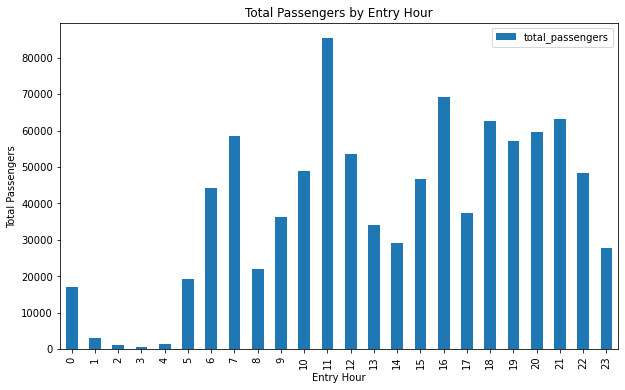

In [174]:
# Create a line plot of total passenger traffic by hour
ax = TOTP.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Entry Hour')
ax.set_ylabel('Total Passengers')
ax.set_title('Total Passengers by Entry Hour')
plt.show()

In [175]:
TOTP=yvr.groupby('Entry.hour').agg({'TaxiCount': 'sum'})

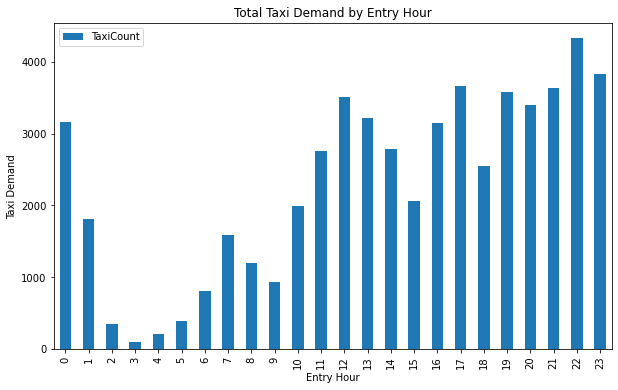

In [176]:
ax = TOTP.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Entry Hour')
ax.set_ylabel('Taxi Demand')
ax.set_title('Total Taxi Demand by Entry Hour')
plt.show()

In [177]:
TOTP=yvr.groupby('Entry.hour').agg({'ride.count': 'sum'})

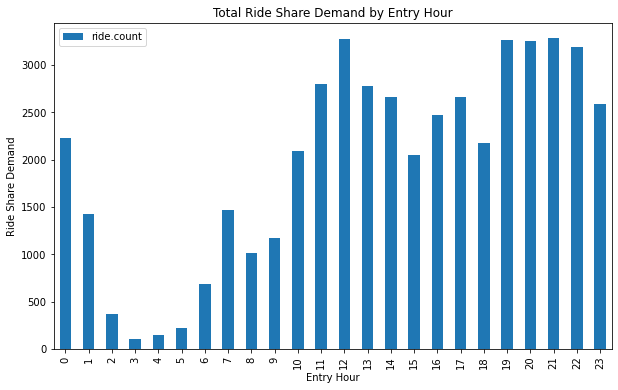

In [178]:
ax = TOTP.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Entry Hour')
ax.set_ylabel('Ride Share Demand')
ax.set_title('Total Ride Share Demand by Entry Hour')
plt.show()

almost identical

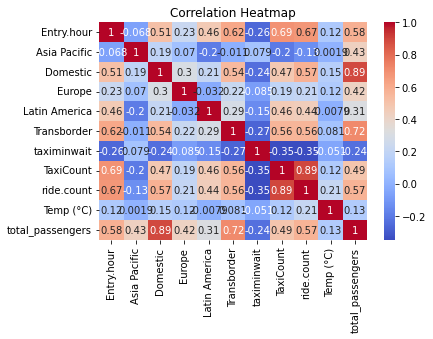

In [179]:
corr = yvr.corr()

# Create a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Add title and display the plot
plt.title('Correlation Heatmap')
plt.show()

In [180]:
corr = yvr.corr()['TaxiCount'].sort_values(ascending=False)
print(corr)


TaxiCount           1.000000
ride.count          0.889876
Entry.hour          0.686008
Transborder         0.559047
total_passengers    0.490080
Domestic            0.474475
Latin America       0.461926
Europe              0.192031
Temp (°C)           0.120496
Asia Pacific       -0.201591
taximinwait        -0.348739
Name: TaxiCount, dtype: float64


In [181]:
#the negative corrolation between taxi demand and drivers wait time totttttaly make sense 

In [182]:
TOTP=yvr.groupby('date').agg({'total_passengers': 'sum'})

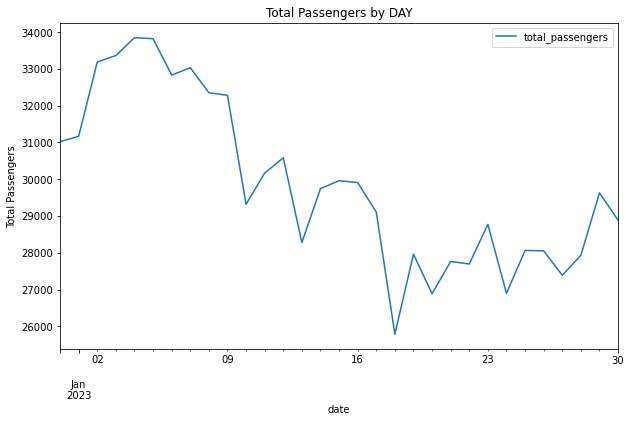

In [183]:
# Create a line plot of total passenger traffic by DATE
ax = TOTP.plot(kind='line', figsize=(10, 6))
ax.set_xlabel('date')
ax.set_ylabel('Total Passengers')
ax.set_title('Total Passengers by DAY')
plt.show()

In [184]:
yvr['dayoftheweek'] = pd.Categorical(yvr['dayoftheweek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

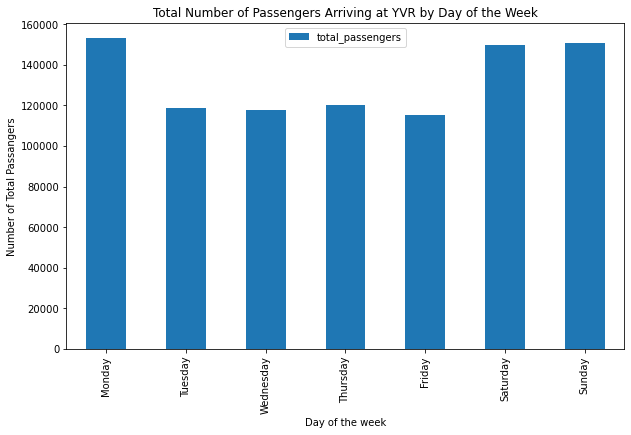

In [185]:
TOTP=yvr.groupby('dayoftheweek').agg({'total_passengers':'sum'})
TOTP.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day of the week')
plt.ylabel('Number of Total Passangers')
plt.title('Total Number of Passengers Arriving at YVR by Day of the Week')
plt.show()

In [186]:
TOTP=yvr.groupby('dayoftheweek').agg({'TaxiCount':'sum'})

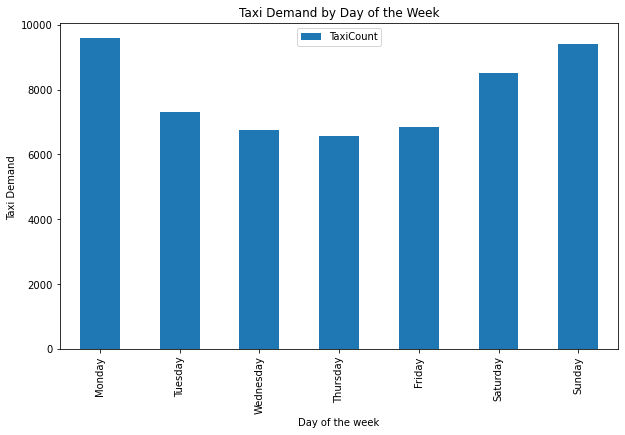

In [187]:
TOTP.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day of the week')
plt.ylabel('Taxi Demand ')
plt.title('Taxi Demand by Day of the Week')
plt.show()

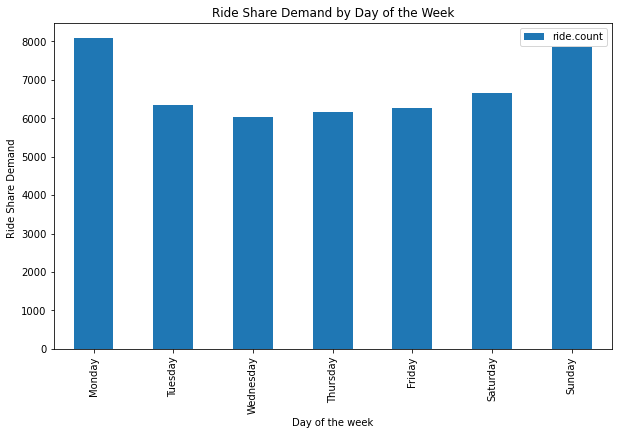

In [188]:
TOTP=yvr.groupby('dayoftheweek').agg({'ride.count':'sum'})
TOTP.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day of the week')
plt.ylabel('Ride Share Demand ')
plt.title('Ride Share Demand by Day of the Week')
plt.show()

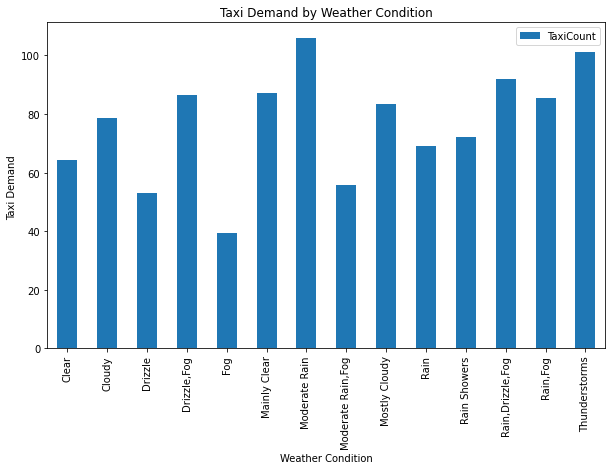

In [189]:
TOTP=yvr.groupby('Weather').agg({'TaxiCount':'mean'})
TOTP.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Weather Condition')
plt.ylabel('Taxi Demand ')
plt.title('Taxi Demand by Weather Condition')
plt.show()

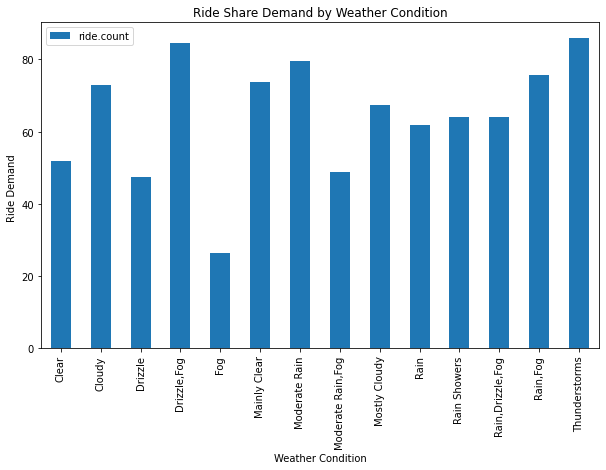

In [190]:
TOTP=yvr.groupby('Weather').agg({'ride.count':'mean'})
TOTP.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Weather Condition')
plt.ylabel('Ride Demand ')
plt.title('Ride Share Demand by Weather Condition')
plt.show()

In [191]:
# Group the data by weather condition and hour of the day
grouped = yvr.groupby(['Weather','Entry.hour']).agg({'TaxiCount':'mean'})

grouped.head(10)

TaxiCount
Weather Entry.hour            
Clear   1            48.500000
        4             6.250000
        7            39.000000
        10           27.000000
        16           99.500000
        19          122.000000
        22          129.666667
Cloudy  1            54.375000
        4             5.625000
        7            55.200000

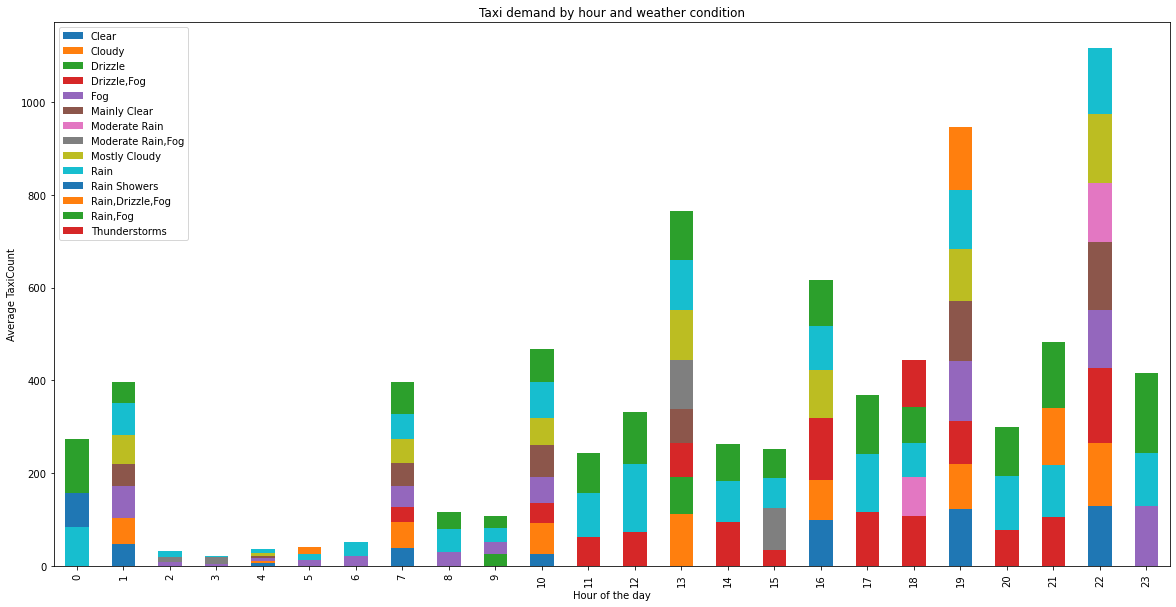

In [192]:
table = pd.pivot_table(data=yvr, values='TaxiCount', index='Entry.hour', columns='Weather', aggfunc='mean')

# create a stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))

table.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Hour of the day')
ax.set_ylabel('Average TaxiCount')
ax.set_title('Taxi demand by hour and weather condition')
ax.legend()

plt.show()

In [193]:
#stscked chart was useless so got to exploar more
table

Weather          Clear      Cloudy  Drizzle  Drizzle,Fog         Fog  \
Entry.hour                                                             
0                  NaN         NaN      NaN          NaN         NaN   
1            48.500000   54.375000      NaN          NaN   70.000000   
2                  NaN         NaN      NaN          NaN    8.500000   
3                  NaN         NaN      NaN          NaN    4.000000   
4             6.250000    5.625000      NaN          NaN    5.666667   
5                  NaN         NaN      NaN          NaN   12.000000   
6                  NaN         NaN      NaN          NaN   21.500000   
7            39.000000   55.200000      NaN         32.0   46.500000   
8                  NaN         NaN      NaN          NaN   31.000000   
9                  NaN         NaN     26.0          NaN   26.000000   
10           27.000000   65.500000      NaN         44.0   55.000000   
11                 NaN         NaN      NaN         62.0         NaN   
12                 NaN         NaN      NaN         74.0         NaN   
13                 NaN  111.142857     80.0         75.0         NaN   
14                 NaN         NaN      NaN         95.0         NaN   
15                 NaN         NaN      NaN         35.0         NaN   
16           99.500000   85.000000      NaN        134.0         NaN   
17                 NaN         NaN      NaN        117.0         NaN   
18                 NaN         NaN      NaN        107.0         NaN   
19          122.000000   97.500000      NaN         94.0  128.000000   
20                 NaN         NaN      NaN         77.0         NaN   
21                 NaN         NaN      NaN        105.0         NaN   
22          129.666667  135.000000      NaN        162.0  125.000000   
23                 NaN         NaN      NaN          NaN  129.000000   

Weather     Mainly Clear  Moderate Rain  Moderate Rain,Fog  Mostly Cloudy  \
Entry.hour                                                                  
0                    NaN            NaN                NaN            NaN   
1              48.000000            NaN                NaN      61.625000   
2                    NaN            NaN               10.0            NaN   
3                    NaN            NaN               16.0            NaN   
4               5.000000            NaN                NaN       5.333333   
5                    NaN            NaN                NaN            NaN   
6                    NaN            NaN                NaN            NaN   
7              49.166667            NaN                NaN      51.250000   
8                    NaN            NaN                NaN            NaN   
9                    NaN            NaN                NaN            NaN   
10             68.500000            NaN                NaN      59.900000   
11                   NaN            NaN                NaN            NaN   
12                   NaN            NaN                NaN            NaN   
13             72.500000            NaN              106.0     106.500000   
14                   NaN            NaN                NaN            NaN   
15                   NaN            NaN               91.0            NaN   
16                   NaN            NaN                NaN     104.277778   
17                   NaN            NaN                NaN            NaN   
18                   NaN           85.0                NaN            NaN   
19            130.000000            NaN                NaN     112.285714   
20                   NaN            NaN                NaN            NaN   
21                   NaN            NaN                NaN            NaN   
22            146.500000          127.0                NaN     148.600000   
23                   NaN            NaN                NaN            NaN   

Weather           Rain  Rain Showers  Rain,Drizzle,Fog    Rain,Fog  \
Entry.hour                                            

In [194]:
table2= table['Rain']

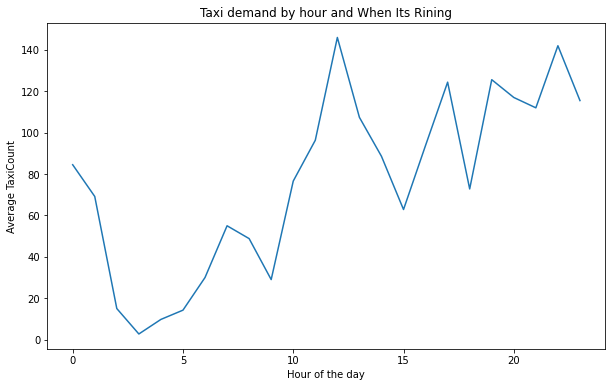

In [195]:
table2.plot(kind='line', figsize=(10, 6))
plt.xlabel('Hour of the day')
plt.ylabel('Average TaxiCount')
plt.title('Taxi demand by hour and When Its Rining')

plt.show()

In [196]:
temp= yvr[['date','TaxiCount','Temp (°C)']]
temp.head(500)

date  TaxiCount  Temp (°C)
0   2022-12-31        108        7.5
1   2022-12-31         97        7.2
2   2022-12-31         24        7.1
3   2022-12-31          3        6.8
4   2022-12-31         10        6.2
..         ...        ...        ...
495 2023-01-20         83        6.5
496 2023-01-20         97        4.9
497 2023-01-20        124        3.9
498 2023-01-20        109        3.2
499 2023-01-20        120        3.0

[500 rows x 3 columns]

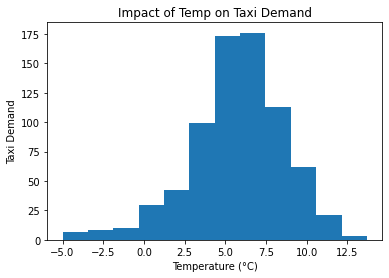

In [203]:

fig, ax = plt.subplots()

ax.hist(temp['Temp (°C)'], bins=12)

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Taxi Demand')
ax.set_title('Impact of Temp on Taxi Demand')
plt.show()


In [204]:
# If we had a longer period instead of one month, we would be able to conduct more in-depth analysis and identify overall 
# and seasonal trends. However, due to computing power constraints, we had to limit our analysis to just one month of data."

In [4]:
import pandas as pd 
import numpy as np

In [5]:
wdr = pd.read_csv(r"C:\Users\emads\Downloads\HourlyWeather.csv")
wdr

date Entry.hour  Temp (°C)        Weather
0       2019-01-01 0:00       0:00        2.0            NaN
1       2019-01-01 1:00       1:00        1.6  Mostly Cloudy
2       2019-01-01 2:00       2:00        1.9            NaN
3       2019-01-01 3:00       3:00        1.9            NaN
4       2019-01-01 4:00       4:00        2.1         Cloudy
...                 ...        ...        ...            ...
36475  2023-02-28 19:00      19:00        1.5   Mainly Clear
36476  2023-02-28 20:00      20:00        1.2            NaN
36477  2023-02-28 21:00      21:00        0.9            NaN
36478  2023-02-28 22:00      22:00        1.8         Cloudy
36479  2023-02-28 23:00      23:00        1.6            NaN

[36480 rows x 4 columns]

In [6]:

wdr['date']=pd.to_datetime(wdr['date'])
wdr['hour'] = wdr['Entry.hour'].apply(lambda x: int(x.split(':')[0]))
del wdr['Entry.hour']
wdr = wdr.rename(columns={'hour': 'Entry.hour'})
wdr

date  Temp (°C)        Weather  Entry.hour
0     2019-01-01 00:00:00        2.0            NaN           0
1     2019-01-01 01:00:00        1.6  Mostly Cloudy           1
2     2019-01-01 02:00:00        1.9            NaN           2
3     2019-01-01 03:00:00        1.9            NaN           3
4     2019-01-01 04:00:00        2.1         Cloudy           4
...                   ...        ...            ...         ...
36475 2023-02-28 19:00:00        1.5   Mainly Clear          19
36476 2023-02-28 20:00:00        1.2            NaN          20
36477 2023-02-28 21:00:00        0.9            NaN          21
36478 2023-02-28 22:00:00        1.8         Cloudy          22
36479 2023-02-28 23:00:00        1.6            NaN          23

[36480 rows x 4 columns]

In [7]:
wdr['date']=pd.to_datetime(wdr['date'])

In [8]:
wdr.dtypes

date          datetime64[ns]
Temp (°C)            float64
Weather               object
Entry.hour             int64
dtype: object

In [9]:
wdr

date  Temp (°C)        Weather  Entry.hour
0     2019-01-01 00:00:00        2.0            NaN           0
1     2019-01-01 01:00:00        1.6  Mostly Cloudy           1
2     2019-01-01 02:00:00        1.9            NaN           2
3     2019-01-01 03:00:00        1.9            NaN           3
4     2019-01-01 04:00:00        2.1         Cloudy           4
...                   ...        ...            ...         ...
36475 2023-02-28 19:00:00        1.5   Mainly Clear          19
36476 2023-02-28 20:00:00        1.2            NaN          20
36477 2023-02-28 21:00:00        0.9            NaN          21
36478 2023-02-28 22:00:00        1.8         Cloudy          22
36479 2023-02-28 23:00:00        1.6            NaN          23

[36480 rows x 4 columns]

In [10]:
yr = pd.read_csv(r"C:\Users\emads\Downloads\Data_by_Hour_2023-05-03.csv")

In [11]:
numeric_cols = yr.select_dtypes(include=[np.number]).columns.tolist()
yr_sum_by_hour = yr.groupby(['date','Entry.hour'])[numeric_cols].sum()
yr_sum_by_hour

Entry.hour  Transborder  Domestic  Latin America  \
date       Entry.hour                                                     
2019-01-01 0.0                0.0        221.0       3.0            0.0   
           1.0                1.0          0.0       3.0            0.0   
           4.0                4.0          0.0       0.0          160.0   
           5.0                5.0          0.0      74.0            0.0   
           6.0               12.0          0.0     298.0            0.0   
...                           ...          ...       ...            ...   
2023-01-31 19.0              38.0        412.0     939.0            0.0   
           20.0              40.0        380.0    1157.0          169.0   
           21.0              42.0        391.0    1268.0          169.0   
           22.0              44.0        789.0     376.0          454.0   
           23.0              46.0        336.0      66.0          294.0   

                       Asia Pacific  Europe  Middle East  Africa  \
date       Entry.hour                                              
2019-01-01 0.0                  0.0     0.0          0.0     0.0   
           1.0                  0.0     0.0          0.0     0.0   
           4.0                  0.0     0.0          0.0     0.0   
           5.0                  0.0     0.0          0.0     0.0   
           6.0                280.0     0.0          0.0     0.0   
...                             ...     ...          ...     ...   
2023-01-31 19.0                 0.0     0.0          0.0     0.0   
           20.0               358.0     0.0          0.0     0.0   
           21.0                 0.0     0.0          0.0     0.0   
           22.0                 0.0     0.0          0.0     0.0   
           23.0                 0.0     0.0          0.0     0.0   

                       total_passengers  TaxiCount  taximinwait  ride.count  
date       Entry.hour                                                        
2019-01-01 0.0                      448      268.0     0.000000         0.0  
           1.0                        3       86.0     0.000000         0.0  
           4.0                      160       21.0    18.147143         0.0  
           5.0                       74       29.0    13.288621         0.0  
           6.0                     1156       64.0    46.936875         0.0  
...                                 ...        ...          ...         ...  
2023-01-31 19.0                    2702      298.0     0.000000        74.0  
           20.0                    4128      110.0    16.032000       124.0  
           21.0                    3656      236.0     0.000000       150.0  
           22.0                    3238      218.0     0.000000        60.0  
           23.0                    1392      176.0     0.000000        10.0  

[29096 rows x 12 columns]

In [12]:
del yr_sum_by_hour['total_passengers']
del yr_sum_by_hour['TaxiCount']
del yr_sum_by_hour['taximinwait']
del yr_sum_by_hour['ride.count']
del yr_sum_by_hour['Entry.hour']

In [13]:

yr_sum_by_hour['total_passengers'] = yr_sum_by_hour[['Asia Pacific', 'Domestic', 'Europe', 'Latin America', 'Transborder','Africa','Middle East']].sum(axis=1)
yr_sum_by_hour

Transborder  Domestic  Latin America  Asia Pacific  \
date       Entry.hour                                                       
2019-01-01 0.0               221.0       3.0            0.0           0.0   
           1.0                 0.0       3.0            0.0           0.0   
           4.0                 0.0       0.0          160.0           0.0   
           5.0                 0.0      74.0            0.0           0.0   
           6.0                 0.0     298.0            0.0         280.0   
...                            ...       ...            ...           ...   
2023-01-31 19.0              412.0     939.0            0.0           0.0   
           20.0              380.0    1157.0          169.0         358.0   
           21.0              391.0    1268.0          169.0           0.0   
           22.0              789.0     376.0          454.0           0.0   
           23.0              336.0      66.0          294.0           0.0   

                       Europe  Middle East  Africa  total_passengers  
date       Entry.hour                                                 
2019-01-01 0.0            0.0          0.0     0.0             224.0  
           1.0            0.0          0.0     0.0               3.0  
           4.0            0.0          0.0     0.0             160.0  
           5.0            0.0          0.0     0.0              74.0  
           6.0            0.0          0.0     0.0             578.0  
...                       ...          ...     ...               ...  
2023-01-31 19.0           0.0          0.0     0.0            1351.0  
           20.0           0.0          0.0     0.0            2064.0  
           21.0           0.0          0.0     0.0            1828.0  
           22.0           0.0          0.0     0.0            1619.0  
           23.0           0.0          0.0     0.0             696.0  

[29096 rows x 8 columns]

In [14]:
yr= yr[['date','Entry.hour','TaxiCount','taximinwait','ride.count']]
yr


date  Entry.hour  TaxiCount  taximinwait  ride.count
0      2019-01-01         0.0      134.0          NaN         NaN
1      2019-01-01         0.0      134.0          NaN         NaN
2      2019-01-01         1.0       86.0          NaN         NaN
3      2019-01-01         4.0       21.0    18.147143         NaN
4      2019-01-01         5.0       29.0    13.288621         NaN
...           ...         ...        ...          ...         ...
53135  2023-01-31        21.0      118.0          NaN        75.0
53136  2023-01-31        22.0      109.0          NaN        30.0
53137  2023-01-31        22.0      109.0          NaN        30.0
53138  2023-01-31        23.0       88.0          NaN         5.0
53139  2023-01-31        23.0       88.0          NaN         5.0

[53140 rows x 5 columns]

In [15]:
yr = yr.drop_duplicates()

In [16]:
yr

date  Entry.hour  TaxiCount  taximinwait  ride.count
0      2019-01-01         0.0      134.0          NaN         NaN
2      2019-01-01         1.0       86.0          NaN         NaN
3      2019-01-01         4.0       21.0    18.147143         NaN
4      2019-01-01         5.0       29.0    13.288621         NaN
5      2019-01-01         6.0       32.0    23.468438         NaN
...           ...         ...        ...          ...         ...
53130  2023-01-31        19.0      149.0          NaN        37.0
53132  2023-01-31        20.0       55.0     8.016000        62.0
53134  2023-01-31        21.0      118.0          NaN        75.0
53136  2023-01-31        22.0      109.0          NaN        30.0
53138  2023-01-31        23.0       88.0          NaN         5.0

[29102 rows x 5 columns]

In [17]:
yr2=yr.merge(yr_sum_by_hour, on= ['date','Entry.hour'], how='left')


In [18]:
yr2['date'] = pd.to_datetime(yr2['date'])
yr2 =yr2.set_index('date')

In [19]:
yr2.dtypes

Entry.hour          float64
TaxiCount           float64
taximinwait         float64
ride.count          float64
Transborder         float64
Domestic            float64
Latin America       float64
Asia Pacific        float64
Europe              float64
Middle East         float64
Africa              float64
total_passengers    float64
dtype: object

In [25]:
yr2.dropna(subset=['Entry.hour'], inplace=True)

In [26]:
yr2['Entry.hour']=yr2['Entry.hour'].astype(int)

In [29]:
yr2=yr2.reset_index()

In [30]:
start_date = wdr['date'].min()
end_date = wdr['date'].max()

# create a list of all possible date/hour combinations
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
date_hour = [(d.date(), d.hour) for d in date_range]

# check if each date/hour combination exists in the dataframe
for dh in date_hour:
    if not [(yr2['date'] == dh[0]) & (yr2['Entry.hour'] == dh[1])].empty:
        # if the row already exists, skip to the next one
        continue
    else:
        # if the row is missing, add a new row with NaN values
        new_row = {'date': dh[0], 'Entry.hour': dh[1], 'Asia Pacific': np.nan, 'Domestic': np.nan, 'Europe': np.nan, 'Latin America': np.nan, 'Transborder': np.nan,'Middle East':np.nan,'Africa':np.nan,'total_passengers':np.nan,'TaxiCount':np.nan,'taximinwait':np.nan,'ride.count':np.nan}
        yr2 = yr2.append(new_row, ignore_index=True)

AttributeError: 'list' object has no attribute 'empty'

In [31]:
start_date = wdr['date'].min()
end_date = wdr['date'].max()

# create a list of all possible date/hour combinations
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
date_hour = [(d.date(), d.hour) for d in date_range]

# check if each date/hour combination exists in the dataframe
for dh in date_hour:
    if not ((yr2['date'] == dh[0]) & (yr2['Entry.hour'] == dh[1])).any():
        # if the row is missing, add a new row with NaN values
        new_row = {'date': dh[0], 'Entry.hour': dh[1], 'Asia Pacific': np.nan, 'Domestic': np.nan, 'Europe': np.nan, 'Latin America': np.nan, 'Transborder': np.nan,'Middle East':np.nan,'Africa':np.nan,'total_passengers':np.nan,'TaxiCount':np.nan,'taximinwait':np.nan,'ride.count':np.nan}
        yr2 = yr2.append(new_row, ignore_index=True)


C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)
C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.dat

C:\Users\emads\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\emads\AppData\Local\Temp\ipykernel_42004\2243383358.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yr2 = yr2.append(new_row, ignore_index=True)


In [ ]:
yvr = pd.concat([yr2,wdr], axis = 1, join = 'outer')
yvr

In [33]:
yr2

date  Entry.hour  TaxiCount  taximinwait  ride.count  \
0      2019-01-01 00:00:00           0      134.0          NaN         NaN   
1      2019-01-01 00:00:00           1       86.0          NaN         NaN   
2      2019-01-01 00:00:00           4       21.0    18.147143         NaN   
3      2019-01-01 00:00:00           5       29.0    13.288621         NaN   
4      2019-01-01 00:00:00           6       32.0    23.468438         NaN   
...                    ...         ...        ...          ...         ...   
36476           2023-02-28          19        NaN          NaN         NaN   
36477           2023-02-28          20        NaN          NaN         NaN   
36478           2023-02-28          21        NaN          NaN         NaN   
36479           2023-02-28          22        NaN          NaN         NaN   
36480           2023-02-28          23        NaN          NaN         NaN   

       Transborder  Domestic  Latin America  Asia Pacific  Europe  \
0            221.0       3.0            0.0           0.0     0.0   
1              0.0       3.0            0.0           0.0     0.0   
2              0.0       0.0          160.0           0.0     0.0   
3              0.0      74.0            0.0           0.0     0.0   
4              0.0     298.0            0.0         280.0     0.0   
...            ...       ...            ...           ...     ...   
36476          NaN       NaN            NaN           NaN     NaN   
36477          NaN       NaN            NaN           NaN     NaN   
36478          NaN       NaN            NaN           NaN     NaN   
36479          NaN       NaN            NaN           NaN     NaN   
36480          NaN       NaN            NaN           NaN     NaN   

       Middle East  Africa  total_passengers  
0              0.0     0.0             224.0  
1              0.0     0.0               3.0  
2              0.0     0.0             160.0  
3              0.0     0.0              74.0  
4              0.0     0.0             578.0  
...            ...     ...               ...  
36476          NaN     NaN               NaN  
36477          NaN     NaN               NaN  
36478          NaN     NaN               NaN  
36479          NaN     NaN               NaN  
36480          NaN     NaN               NaN  

[36481 rows x 13 columns]

In [37]:
yr2 = yr2.sort_values(['date', 'Entry.hour'])
yr2

date  Entry.hour  TaxiCount  taximinwait  ride.count  \
0      2019-01-01 00:00:00           0      134.0          NaN         NaN   
29096           2019-01-01           0        NaN          NaN         NaN   
1      2019-01-01 00:00:00           1       86.0          NaN         NaN   
29097           2019-01-01           2        NaN          NaN         NaN   
29098           2019-01-01           3        NaN          NaN         NaN   
...                    ...         ...        ...          ...         ...   
36476           2023-02-28          19        NaN          NaN         NaN   
36477           2023-02-28          20        NaN          NaN         NaN   
36478           2023-02-28          21        NaN          NaN         NaN   
36479           2023-02-28          22        NaN          NaN         NaN   
36480           2023-02-28          23        NaN          NaN         NaN   

       Transborder  Domestic  Latin America  Asia Pacific  Europe  \
0            221.0       3.0            0.0           0.0     0.0   
29096          NaN       NaN            NaN           NaN     NaN   
1              0.0       3.0            0.0           0.0     0.0   
29097          NaN       NaN            NaN           NaN     NaN   
29098          NaN       NaN            NaN           NaN     NaN   
...            ...       ...            ...           ...     ...   
36476          NaN       NaN            NaN           NaN     NaN   
36477          NaN       NaN            NaN           NaN     NaN   
36478          NaN       NaN            NaN           NaN     NaN   
36479          NaN       NaN            NaN           NaN     NaN   
36480          NaN       NaN            NaN           NaN     NaN   

       Middle East  Africa  total_passengers  
0              0.0     0.0             224.0  
29096          NaN     NaN               NaN  
1              0.0     0.0               3.0  
29097          NaN     NaN               NaN  
29098          NaN     NaN               NaN  
...            ...     ...               ...  
36476          NaN     NaN               NaN  
36477          NaN     NaN               NaN  
36478          NaN     NaN               NaN  
36479          NaN     NaN               NaN  
36480          NaN     NaN               NaN  

[36481 rows x 13 columns]

In [38]:
yr2.to_csv('ye2.csv')

In [39]:
wdr.to_csv('wdr.csv')

In [42]:
yvr = pd.read_csv('ye2.csv')

In [45]:
yvr.tail(50)

date  Entry.hour  TaxiCount  taximinwait  ride.count  \
35758  2023-01-29 0:00          22      153.0          NaN        16.0   
35759  2023-01-29 0:00          23      125.0          NaN         7.0   
35760  2023-01-30 0:00           0      111.0          NaN         5.0   
35761       2023-01-30           1        NaN          NaN         NaN   
35762       2023-01-30           2        NaN          NaN         NaN   
35763       2023-01-30           3        NaN          NaN         NaN   
35764       2023-01-30           4        NaN          NaN         NaN   
35765  2023-01-30 0:00           5        6.0          NaN       172.0   
35766  2023-01-30 0:00           6       34.0          NaN       230.0   
35767  2023-01-30 0:00           7       46.0          NaN       239.0   
35768  2023-01-30 0:00           8       31.0    29.415484        99.0   
35769  2023-01-30 0:00           9       31.0    21.201290       149.0   
35770  2023-01-30 0:00          10       58.0          NaN       175.0   
35771  2023-01-30 0:00          11      129.0          NaN       167.0   
35772  2023-01-30 0:00          12      119.0          NaN       119.0   
35773  2023-01-30 0:00          13      101.0          NaN        93.0   
35774  2023-01-30 0:00          14      109.0          NaN        80.0   
35775  2023-01-30 0:00          15       69.0          NaN        70.0   
35776  2023-01-30 0:00          16      115.0          NaN        72.0   
35777  2023-01-30 0:00          17      140.0          NaN        70.0   
35778  2023-01-30 0:00          18       80.0          NaN        46.0   
35779  2023-01-30 0:00          19       83.0          NaN        51.0   
35780  2023-01-30 0:00          20       75.0          NaN        60.0   
35781  2023-01-30 0:00          21      107.0          NaN        47.0   
35782  2023-01-30 0:00          22      132.0          NaN        38.0   
35783  2023-01-30 0:00          23      108.0          NaN         5.0   
35784  2023-01-31 0:00           0       90.0          NaN         2.0   
35785       2023-01-31           1        NaN          NaN         NaN   
35786  2023-01-31 0:00           2        6.0          NaN         8.0   
35787       2023-01-31           3        NaN          NaN         NaN   
35788       2023-01-31           4        NaN          NaN         NaN   
35789  2023-01-31 0:00           5       11.0          NaN       177.0   
35790  2023-01-31 0:00           6       29.0          NaN       236.0   
35791  2023-01-31 0:00           7       35.0          NaN       150.0   
35792  2023-01-31 0:00           8       24.0    35.146250        80.0   
35793  2023-01-31 0:00           9       31.0          NaN       120.0   
35794  2023-01-31 0:00          10       83.0          NaN       183.0   
35795  2023-01-31 0:00          11       80.0          NaN       168.0   
35796  2023-01-31 0:00          12       90.0          NaN       116.0   
35797  2023-01-31 0:00          13       66.0          NaN        98.0   
35798  2023-01-31 0:00          14       57.0          NaN       107.0   
35799  2023-01-31 0:00          15       71.0          NaN        77.0   
35800  2023-01-31 0:00          16       95.0          NaN        63.0   
35801  2023-01-31 0:00          17      100.0          NaN        52.0   
35802  2023-01-31 0:00          18      107.0          NaN        46.0   
35803  2023-01-31 0:00          19      149.0          NaN        37.0   
35804  2023-01-31 0:00          20       55.0     8.016000        62.0   
35805  2023-01-31 0:00          21      118.0          NaN        75.0   
35806  2023-01-31 0:00          22      109.0          NaN        30.0   
35807  2023-01-31 0:00          23       88.0          NaN         5.0   

       Transborder  Domestic  Latin America  Asia Pacific  Europe  \
35758        814.0     498.0          165.0           0.0     0.0   
35759        745.0     174.0          243.0           0.0     0.0   
35760        498.0     147.0        

In [46]:
yvr['date'] = pd.to_datetime(yvr['date'])
yvr['date'] = yvr['date'].dt.date
yvr

date  Entry.hour  TaxiCount  taximinwait  ride.count  \
0      2019-01-01           0      134.0          NaN         NaN   
1      2019-01-01           1       86.0          NaN         NaN   
2      2019-01-01           2        NaN          NaN         NaN   
3      2019-01-01           3        NaN          NaN         NaN   
4      2019-01-01           4       21.0    18.147143         NaN   
...           ...         ...        ...          ...         ...   
35803  2023-01-31          19      149.0          NaN        37.0   
35804  2023-01-31          20       55.0     8.016000        62.0   
35805  2023-01-31          21      118.0          NaN        75.0   
35806  2023-01-31          22      109.0          NaN        30.0   
35807  2023-01-31          23       88.0          NaN         5.0   

       Transborder  Domestic  Latin America  Asia Pacific  Europe  \
0            221.0       3.0            0.0           0.0     0.0   
1              0.0       3.0            0.0           0.0     0.0   
2              NaN       NaN            NaN           NaN     NaN   
3              NaN       NaN            NaN           NaN     NaN   
4              0.0       0.0          160.0           0.0     0.0   
...            ...       ...            ...           ...     ...   
35803        412.0     939.0            0.0           0.0     0.0   
35804        380.0    1157.0          169.0         358.0     0.0   
35805        391.0    1268.0          169.0           0.0     0.0   
35806        789.0     376.0          454.0           0.0     0.0   
35807        336.0      66.0          294.0           0.0     0.0   

       Middle East  Africa  total_passengers  Temp (°C)        Weather  
0              0.0     0.0             224.0        2.0            NaN  
1              0.0     0.0               3.0        1.6  Mostly Cloudy  
2              NaN     NaN               NaN        1.9            NaN  
3              NaN     NaN               NaN        1.9            NaN  
4              0.0     0.0             160.0        2.1         Cloudy  
...            ...     ...               ...        ...            ...  
35803          0.0     0.0            1351.0        1.5         Cloudy  
35804          0.0     0.0            2064.0        1.2           Snow  
35805          0.0     0.0            1828.0        0.6           Snow  
35806          0.0     0.0            1619.0        0.2           Snow  
35807          0.0     0.0             696.0        0.2           Snow  

[35808 rows x 15 columns]

In [48]:
yvr.to_csv('YVRLast.csv', index = False)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [7]:
yvr = pd.read_csv(r"C:\Users\emads\OneDrive\Desktop\BCIT\4\AI\Project\YVRLast.csv")

In [8]:
yvr['date'] = pd.to_datetime(yvr['date'])
yvr

date  Entry.hour  TaxiCount  taximinwait  ride.count  Transborder  \
0     2019-01-01           0      134.0          NaN         NaN        221.0   
1     2019-01-01           1       86.0          NaN         NaN          0.0   
2     2019-01-01           2        NaN          NaN         NaN          NaN   
3     2019-01-01           3        NaN          NaN         NaN          NaN   
4     2019-01-01           4       21.0    18.147143         NaN          0.0   
...          ...         ...        ...          ...         ...          ...   
35803 2023-01-31          19      149.0          NaN        37.0        412.0   
35804 2023-01-31          20       55.0     8.016000        62.0        380.0   
35805 2023-01-31          21      118.0          NaN        75.0        391.0   
35806 2023-01-31          22      109.0          NaN        30.0        789.0   
35807 2023-01-31          23       88.0          NaN         5.0        336.0   

       Domestic  Latin America  Asia Pacific  Europe  Middle East  Africa  \
0           3.0            0.0           0.0     0.0          0.0     0.0   
1           3.0            0.0           0.0     0.0          0.0     0.0   
2           NaN            NaN           NaN     NaN          NaN     NaN   
3           NaN            NaN           NaN     NaN          NaN     NaN   
4           0.0          160.0           0.0     0.0          0.0     0.0   
...         ...            ...           ...     ...          ...     ...   
35803     939.0            0.0           0.0     0.0          0.0     0.0   
35804    1157.0          169.0         358.0     0.0          0.0     0.0   
35805    1268.0          169.0           0.0     0.0          0.0     0.0   
35806     376.0          454.0           0.0     0.0          0.0     0.0   
35807      66.0          294.0           0.0     0.0          0.0     0.0   

       total_passengers  Temp (°C)        Weather  
0                 224.0        2.0            NaN  
1                   3.0        1.6  Mostly Cloudy  
2                   NaN        1.9            NaN  
3                   NaN        1.9            NaN  
4                 160.0        2.1         Cloudy  
...                 ...        ...            ...  
35803            1351.0        1.5         Cloudy  
35804            2064.0        1.2           Snow  
35805            1828.0        0.6           Snow  
35806            1619.0        0.2           Snow  
35807             696.0        0.2           Snow  

[35808 rows x 15 columns]

# prepare data for model 

In [9]:
yvr.fillna(0, inplace=True)

In [10]:
df = yvr.groupby('date').agg({'TaxiCount': 'sum'})

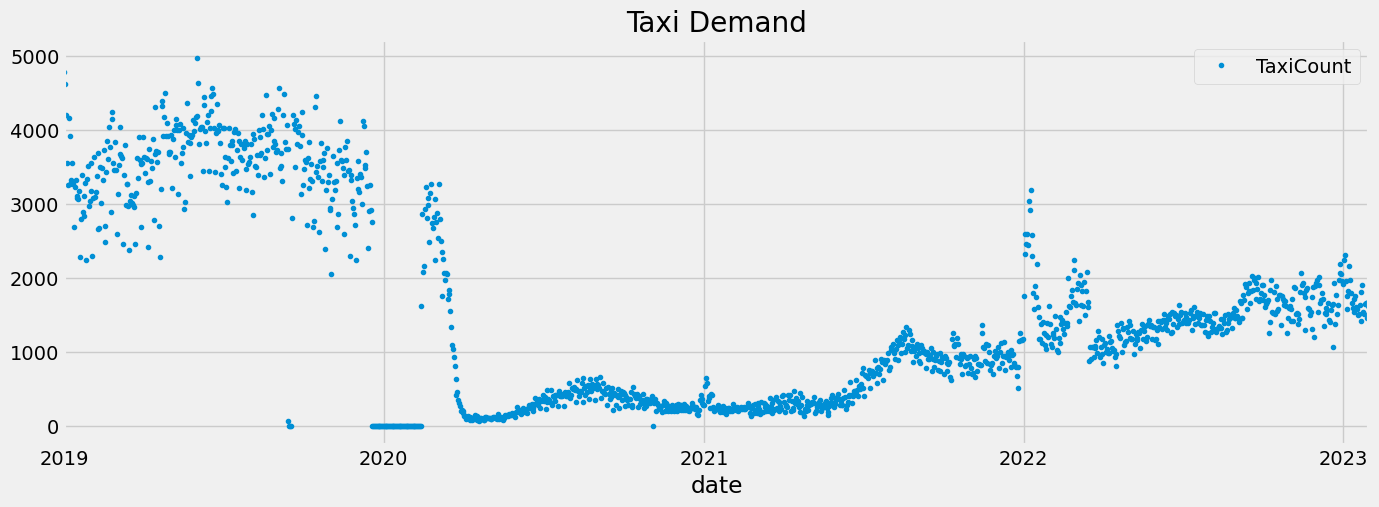

In [11]:
df.plot(y='TaxiCount',
        style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Taxi Demand')
plt.show()

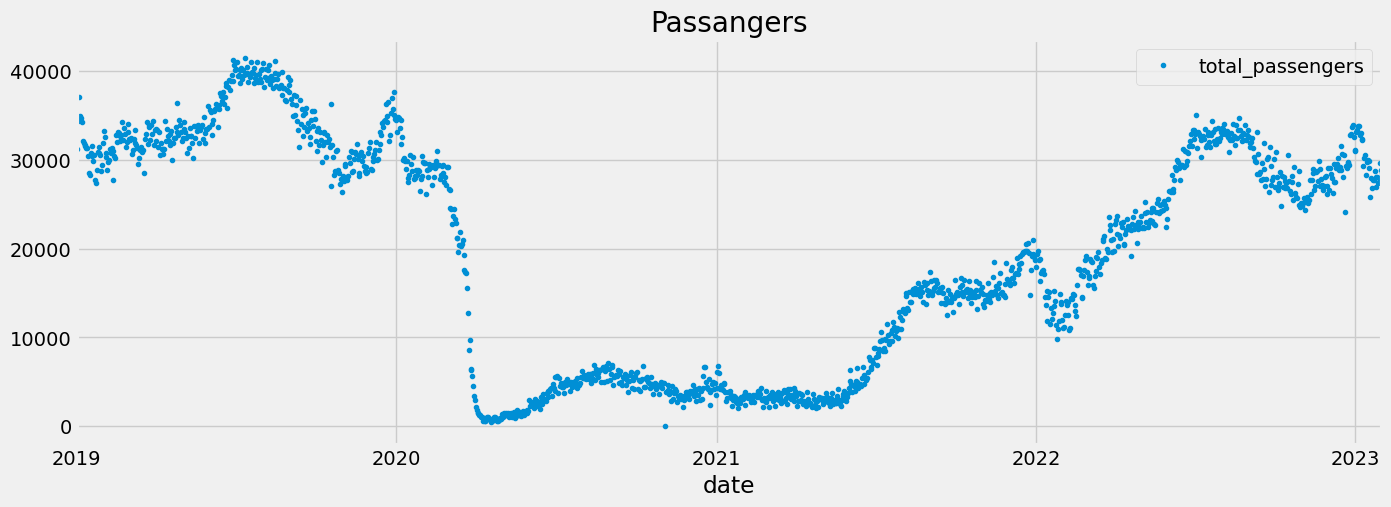

In [12]:
df2 = yvr.groupby('date').agg({'total_passengers': 'sum'})

df2.plot(y='total_passengers',
        style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Passangers')
plt.show()

C:\Users\emads\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


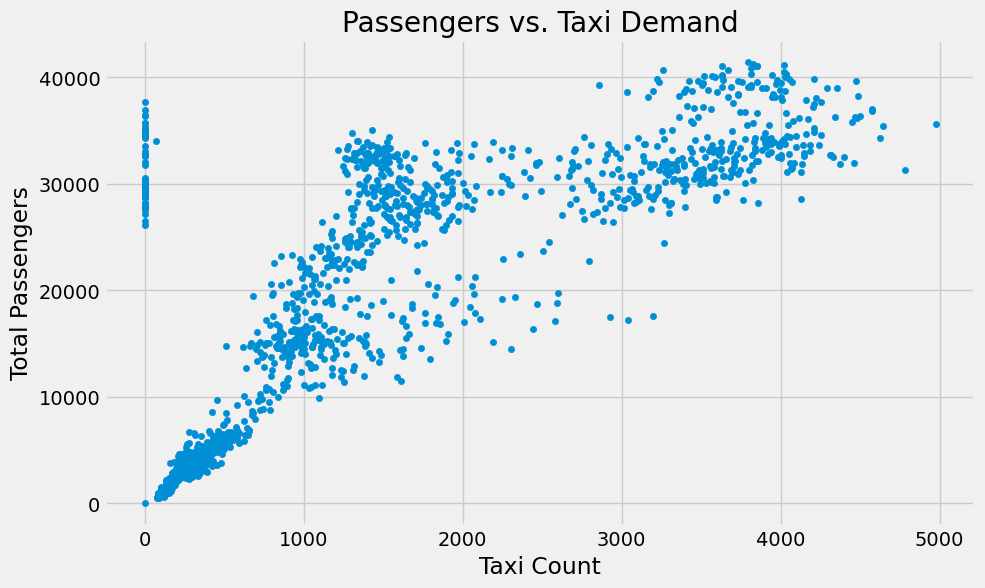

In [13]:
df = yvr.groupby('date').agg({'TaxiCount': 'sum','total_passengers': 'sum'})

df.plot(kind='scatter', x='TaxiCount', y='total_passengers', figsize=(10, 6))
plt.title('Passengers vs. Taxi Demand')
plt.xlabel('Taxi Count')
plt.ylabel('Total Passengers')
plt.show()

In [14]:
yvr = yvr.set_index('date')

In [15]:
# I will exclude Covid data and when in our dataset we have the number of passangers coming to the airport
# but taxi count is missing data

yvr = yvr.loc[(yvr.index <= '2019-09-10') |  (yvr.index > '2021-09-30') ]

In [16]:
yvr

Entry.hour  TaxiCount  taximinwait  ride.count  Transborder  \
date                                                                      
2019-01-01           0      134.0     0.000000         0.0        221.0   
2019-01-01           1       86.0     0.000000         0.0          0.0   
2019-01-01           2        0.0     0.000000         0.0          0.0   
2019-01-01           3        0.0     0.000000         0.0          0.0   
2019-01-01           4       21.0    18.147143         0.0          0.0   
...                ...        ...          ...         ...          ...   
2023-01-31          19      149.0     0.000000        37.0        412.0   
2023-01-31          20       55.0     8.016000        62.0        380.0   
2023-01-31          21      118.0     0.000000        75.0        391.0   
2023-01-31          22      109.0     0.000000        30.0        789.0   
2023-01-31          23       88.0     0.000000         5.0        336.0   

            Domestic  Latin America  Asia Pacific  Europe  Middle East  \
date                                                                     
2019-01-01       3.0            0.0           0.0     0.0          0.0   
2019-01-01       3.0            0.0           0.0     0.0          0.0   
2019-01-01       0.0            0.0           0.0     0.0          0.0   
2019-01-01       0.0            0.0           0.0     0.0          0.0   
2019-01-01       0.0          160.0           0.0     0.0          0.0   
...              ...            ...           ...     ...          ...   
2023-01-31     939.0            0.0           0.0     0.0          0.0   
2023-01-31    1157.0          169.0         358.0     0.0          0.0   
2023-01-31    1268.0          169.0           0.0     0.0          0.0   
2023-01-31     376.0          454.0           0.0     0.0          0.0   
2023-01-31      66.0          294.0           0.0     0.0          0.0   

            Africa  total_passengers  Temp (°C)        Weather  
date                                                            
2019-01-01     0.0             224.0        2.0              0  
2019-01-01     0.0               3.0        1.6  Mostly Cloudy  
2019-01-01     0.0               0.0        1.9              0  
2019-01-01     0.0               0.0        1.9              0  
2019-01-01     0.0             160.0        2.1         Cloudy  
...            ...               ...        ...            ...  
2023-01-31     0.0            1351.0        1.5         Cloudy  
2023-01-31     0.0            2064.0        1.2           Snow  
2023-01-31     0.0            1828.0        0.6           Snow  
2023-01-31     0.0            1619.0        0.2           Snow  
2023-01-31     0.0             696.0        0.2           Snow  

[17784 rows x 14 columns]

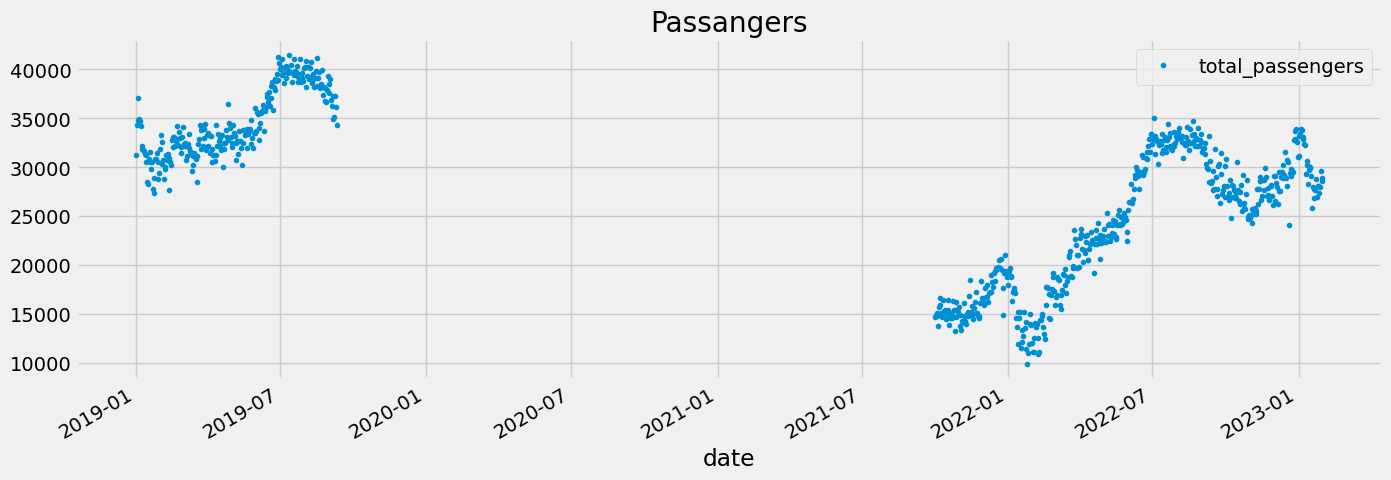

In [17]:
df2 = yvr.groupby('date').agg({'total_passengers': 'sum'})

df2.plot(y='total_passengers',
        style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Passangers')
plt.show()

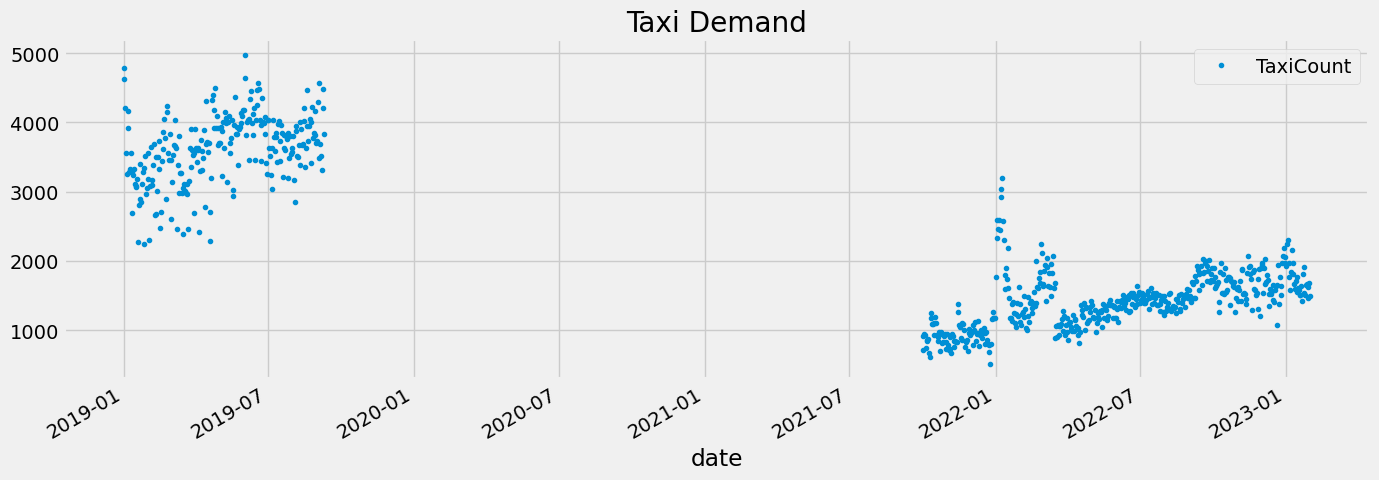

In [18]:
df = yvr.groupby('date').agg({'TaxiCount': 'sum'})
df.plot(y='TaxiCount',
        style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Taxi Demand')
plt.show()

C:\Users\emads\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


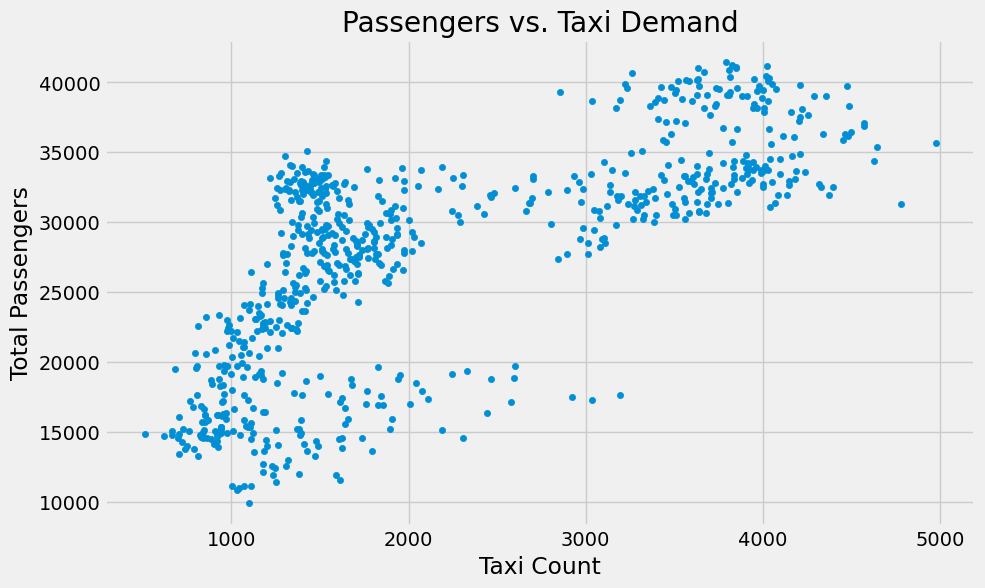

In [19]:
df = yvr.groupby('date').agg({'TaxiCount': 'sum','total_passengers': 'sum'})

df.plot(kind='scatter', x='TaxiCount', y='total_passengers', figsize=(10, 6))
plt.title('Passengers vs. Taxi Demand')
plt.xlabel('Taxi Count')
plt.ylabel('Total Passengers')
plt.show()

In [20]:

    yvr['dayofweek'] = yvr.index.dayofweek
    yvr['quarter'] = yvr.index.quarter
    yvr['month'] = yvr.index.month
    yvr['year'] = yvr.index.year
    yvr['dayofyear'] = yvr.index.dayofyear
    yvr['dayofmonth'] = yvr.index.day
    yvr['weekofyear'] = yvr.index.isocalendar().week.astype(int)

In [21]:
yvr

Entry.hour  TaxiCount  taximinwait  ride.count  Transborder  \
date                                                                      
2019-01-01           0      134.0     0.000000         0.0        221.0   
2019-01-01           1       86.0     0.000000         0.0          0.0   
2019-01-01           2        0.0     0.000000         0.0          0.0   
2019-01-01           3        0.0     0.000000         0.0          0.0   
2019-01-01           4       21.0    18.147143         0.0          0.0   
...                ...        ...          ...         ...          ...   
2023-01-31          19      149.0     0.000000        37.0        412.0   
2023-01-31          20       55.0     8.016000        62.0        380.0   
2023-01-31          21      118.0     0.000000        75.0        391.0   
2023-01-31          22      109.0     0.000000        30.0        789.0   
2023-01-31          23       88.0     0.000000         5.0        336.0   

            Domestic  Latin America  Asia Pacific  Europe  Middle East  ...  \
date                                                                    ...   
2019-01-01       3.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       3.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0          160.0           0.0     0.0          0.0  ...   
...              ...            ...           ...     ...          ...  ...   
2023-01-31     939.0            0.0           0.0     0.0          0.0  ...   
2023-01-31    1157.0          169.0         358.0     0.0          0.0  ...   
2023-01-31    1268.0          169.0           0.0     0.0          0.0  ...   
2023-01-31     376.0          454.0           0.0     0.0          0.0  ...   
2023-01-31      66.0          294.0           0.0     0.0          0.0  ...   

            total_passengers  Temp (°C)        Weather dayofweek  quarter  \
date                                                                        
2019-01-01             224.0        2.0              0         1        1   
2019-01-01               3.0        1.6  Mostly Cloudy         1        1   
2019-01-01               0.0        1.9              0         1        1   
2019-01-01               0.0        1.9              0         1        1   
2019-01-01             160.0        2.1         Cloudy         1        1   
...                      ...        ...            ...       ...      ...   
2023-01-31            1351.0        1.5         Cloudy         1        1   
2023-01-31            2064.0        1.2           Snow         1        1   
2023-01-31            1828.0        0.6           Snow         1        1   
2023-01-31            1619.0        0.2           Snow         1        1   
2023-01-31             696.0        0.2           Snow         1        1   

            month  year  dayofyear  dayofmonth  weekofyear  
date                                                        
2019-01-01      1  2019          1           1           1  
2019-01-01      1  2019          1           1           1  
2019-01-01      1  2019          1           1           1  
2019-01-01      1  2019          1           1           1  
2019-01-01      1  2019          1           1           1  
...           ...   ...        ...         ...         ...  
2023-01-31      1  2023         31          31           5  
2023-01-31      1  2023         31          31           5  
2023-01-31      1  2023         31          31           5  
2023-01-31      1  2023         31          31           5  
2023-01-31      1  2023         31          31           5  

[17784 rows x 21 columns]

In [22]:
#replace all the misssing data in weather column 
yvr['Weather'].replace(to_replace=0, method='ffill', inplace=True)
yvr['Weather'].replace(to_replace=0, method='bfill', inplace=True)

In [23]:
yvr

Entry.hour  TaxiCount  taximinwait  ride.count  Transborder  \
date                                                                      
2019-01-01           0      134.0     0.000000         0.0        221.0   
2019-01-01           1       86.0     0.000000         0.0          0.0   
2019-01-01           2        0.0     0.000000         0.0          0.0   
2019-01-01           3        0.0     0.000000         0.0          0.0   
2019-01-01           4       21.0    18.147143         0.0          0.0   
...                ...        ...          ...         ...          ...   
2023-01-31          19      149.0     0.000000        37.0        412.0   
2023-01-31          20       55.0     8.016000        62.0        380.0   
2023-01-31          21      118.0     0.000000        75.0        391.0   
2023-01-31          22      109.0     0.000000        30.0        789.0   
2023-01-31          23       88.0     0.000000         5.0        336.0   

            Domestic  Latin America  Asia Pacific  Europe  Middle East  ...  \
date                                                                    ...   
2019-01-01       3.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       3.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0          160.0           0.0     0.0          0.0  ...   
...              ...            ...           ...     ...          ...  ...   
2023-01-31     939.0            0.0           0.0     0.0          0.0  ...   
2023-01-31    1157.0          169.0         358.0     0.0          0.0  ...   
2023-01-31    1268.0          169.0           0.0     0.0          0.0  ...   
2023-01-31     376.0          454.0           0.0     0.0          0.0  ...   
2023-01-31      66.0          294.0           0.0     0.0          0.0  ...   

            total_passengers  Temp (°C)        Weather dayofweek  quarter  \
date                                                                        
2019-01-01             224.0        2.0  Mostly Cloudy         1        1   
2019-01-01               3.0        1.6  Mostly Cloudy         1        1   
2019-01-01               0.0        1.9  Mostly Cloudy         1        1   
2019-01-01               0.0        1.9  Mostly Cloudy         1        1   
2019-01-01             160.0        2.1         Cloudy         1        1   
...                      ...        ...            ...       ...      ...   
2023-01-31            1351.0        1.5         Cloudy         1        1   
2023-01-31            2064.0        1.2           Snow         1        1   
2023-01-31            1828.0        0.6           Snow         1        1   
2023-01-31            1619.0        0.2           Snow         1        1   
2023-01-31             696.0        0.2           Snow         1        1   

            month  year  dayofyear  dayofmonth  weekofyear  
date                                                        
2019-01-01      1  2019          1           1           1  
2019-01-01      1  2019          1           1           1  
2019-01-01      1  2019          1           1           1  
2019-01-01      1  2019          1           1           1  
2019-01-01      1  2019          1           1           1  
...           ...   ...        ...         ...         ...  
2023-01-31      1  2023         31          31           5  
2023-01-31      1  2023         31          31           5  
2023-01-31      1  2023         31          31           5  
2023-01-31      1  2023         31          31           5  
2023-01-31      1  2023         31          31           5  

[17784 rows x 21 columns]

In [24]:
yvr['Weather'].unique()

array(['Mostly Cloudy', 'Cloudy', 'Rain', 'Moderate Rain',
       'Moderate Rain,Fog', 'Mainly Clear', 'Rain Showers', 'Clear',
       'Fog', 'Freezing Fog', 'Rain,Drizzle', 'Drizzle', 'Drizzle,Fog',
       'Rain,Drizzle,Fog', 'Snow', 'Moderate Snow', 'Rain,Fog',
       'Rain,Snow,Fog', 'Snow,Fog', 'Rain,Snow', 'Moderate Rain Showers',
       'Rain,Rain Showers', 'Moderate Rain Showers,Fog',
       'Thunderstorms,Rain', 'Heavy Rain,Fog', 'Rain Showers,Drizzle,Fog',
       'Thunderstorms,Rain Showers', 'Rain Showers,Hail', 'Snow Showers',
       'Rain,Snow Showers', 'Heavy Snow', 'Freezing Drizzle', 'Rain,Hail',
       'Rain Showers,Ice Pellet Showers', 'Heavy Rain', 'Smoke',
       'Smoke,Haze', 'Fog,Haze', 'Fog,Smoke', 'Moderate Snow,Fog',
       'Moderate Ice Pellets', 'Thunderstorms,Snow Showers',
       'Snow,Ice Pellets', 'Ice Pellets', 'Freezing Rain,Fog',
       'Thunderstorms'], dtype=object)

In [25]:
weather_map = {
    'Rain': 'Rain',
    'Snow': 'Snow',
    'Freezing Rain': 'Rain',
    'Thunderstorms': 'Rain',
    'Haze': 'Fog',
    'Fog': 'Fog',
    'Mist': 'Fog',
    'Drizzle': 'Rain',
    'Mainly Clear': 'Clear',
    'Mostly Cloudy': 'Cloudy',
    'Cloudy': 'Cloudy',
    'Clear': 'Clear',
    'Moderate Rain': 'Rain',
    'Moderate Rain,Fog': 'Rain',
    'Rain Showers': 'Rain',
    'Rain,Drizzle': 'Rain',
    'Drizzle,Fog': 'Rain',
    'Rain,Drizzle,Fog': 'Rain',
    'Moderate Snow': 'Snow',
    'Rain,Fog': 'Rain',
    'Rain,Snow,Fog': 'Rain',
    'Snow,Fog': 'Snow',
    'Rain,Snow': 'Rain',
    'Moderate Rain Showers': 'Rain',
    'Heavy Rain,Fog': 'Rain',
    'Rain Showers,Fog': 'Rain',
    'Moderate Snow,Blowing Snow': 'Snow',
    'Heavy Snow': 'Snow',
    'Snow Showers': 'Snow',
    'Rain,Rain Showers': 'Rain',
    'Moderate Rain Showers,Fog': 'Rain',
    'Thunderstorms,Rain': 'Rain',
    'Rain Showers,Drizzle,Fog': 'Rain',
    'Thunderstorms,Rain Showers': 'Rain',
    'Rain Showers,Hail': 'Rain',
    'Rain,Snow Showers': 'Rain',
    'Freezing Drizzle': 'Rain',
    'Rain,Hail': 'Rain',
    'Rain Showers,Ice Pellet Showers': 'Rain',
    'Heavy Rain': 'Rain',
    'Smoke': 'Fog',
    'Smoke,Haze': 'Fog',
    'Fog,Haze': 'Fog',
    'Fog,Smoke': 'Fog',
    'Moderate Snow,Fog': 'Snow',
    'Moderate Ice Pellets': 'Rain',
    'Thunderstorms,Snow Showers': 'Snow',
    'Snow,Ice Pellets': 'Snow',
    'Ice Pellets': 'Rain'
}
yvr['Weather'] = yvr['Weather'].map(weather_map)

In [26]:
wdr =  pd.get_dummies(yvr['Weather'], prefix = 'w')
wdr

w_Clear  w_Cloudy  w_Fog  w_Rain  w_Snow
date                                                
2019-01-01        0         1      0       0       0
2019-01-01        0         1      0       0       0
2019-01-01        0         1      0       0       0
2019-01-01        0         1      0       0       0
2019-01-01        0         1      0       0       0
...             ...       ...    ...     ...     ...
2023-01-31        0         1      0       0       0
2023-01-31        0         0      0       0       1
2023-01-31        0         0      0       0       1
2023-01-31        0         0      0       0       1
2023-01-31        0         0      0       0       1

[17784 rows x 5 columns]

In [27]:
yvr2 = pd.concat([yvr , wdr], axis = 1, join= 'outer')
del yvr2['Weather']
yvr2

Entry.hour  TaxiCount  taximinwait  ride.count  Transborder  \
date                                                                      
2019-01-01           0      134.0     0.000000         0.0        221.0   
2019-01-01           1       86.0     0.000000         0.0          0.0   
2019-01-01           2        0.0     0.000000         0.0          0.0   
2019-01-01           3        0.0     0.000000         0.0          0.0   
2019-01-01           4       21.0    18.147143         0.0          0.0   
...                ...        ...          ...         ...          ...   
2023-01-31          19      149.0     0.000000        37.0        412.0   
2023-01-31          20       55.0     8.016000        62.0        380.0   
2023-01-31          21      118.0     0.000000        75.0        391.0   
2023-01-31          22      109.0     0.000000        30.0        789.0   
2023-01-31          23       88.0     0.000000         5.0        336.0   

            Domestic  Latin America  Asia Pacific  Europe  Middle East  ...  \
date                                                                    ...   
2019-01-01       3.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       3.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0          160.0           0.0     0.0          0.0  ...   
...              ...            ...           ...     ...          ...  ...   
2023-01-31     939.0            0.0           0.0     0.0          0.0  ...   
2023-01-31    1157.0          169.0         358.0     0.0          0.0  ...   
2023-01-31    1268.0          169.0           0.0     0.0          0.0  ...   
2023-01-31     376.0          454.0           0.0     0.0          0.0  ...   
2023-01-31      66.0          294.0           0.0     0.0          0.0  ...   

            month  year  dayofyear  dayofmonth  weekofyear  w_Clear  w_Cloudy  \
date                                                                            
2019-01-01      1  2019          1           1           1        0         1   
2019-01-01      1  2019          1           1           1        0         1   
2019-01-01      1  2019          1           1           1        0         1   
2019-01-01      1  2019          1           1           1        0         1   
2019-01-01      1  2019          1           1           1        0         1   
...           ...   ...        ...         ...         ...      ...       ...   
2023-01-31      1  2023         31          31           5        0         1   
2023-01-31      1  2023         31          31           5        0         0   
2023-01-31      1  2023         31          31           5        0         0   
2023-01-31      1  2023         31          31           5        0         0   
2023-01-31      1  2023         31          31           5        0         0   

            w_Fog  w_Rain  w_Snow  
date                               
2019-01-01      0       0       0  
2019-01-01      0       0       0  
2019-01-01      0       0       0  
2019-01-01      0       0       0  
2019-01-01      0       0       0  
...           ...     ...     ...  
2023-01-31      0       0       0  
2023-01-31      0       0       1  
2023-01-31      0       0       1  
2023-01-31      0       0       1  
2023-01-31      0       0       1  

[17784 rows x 25 columns]

In [28]:
train = yvr2.loc[yvr2.index < '2023-12-31']
test = yvr2.loc[yvr2.index >= '2023-01-01']


In [29]:
yvr2.dtypes

Entry.hour            int64
TaxiCount           float64
taximinwait         float64
ride.count          float64
Transborder         float64
Domestic            float64
Latin America       float64
Asia Pacific        float64
Europe              float64
Middle East         float64
Africa              float64
total_passengers    float64
Temp (°C)           float64
dayofweek             int64
quarter               int64
month                 int64
year                  int64
dayofyear             int64
dayofmonth            int64
weekofyear            int32
w_Clear               uint8
w_Cloudy              uint8
w_Fog                 uint8
w_Rain                uint8
w_Snow                uint8
dtype: object

# Models 

my First model is XGboost

In [30]:
features = yvr2.columns.drop(['TaxiCount','taximinwait', 'ride.count'] )
target = 'TaxiCount'

X_train = train[features]
y_train = train[target]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=2500,
                       objective='reg:linear',
                       random_state=2000,
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train)],
        verbose=100)

[20:22:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.09516
[100]	validation_0-rmse:55.06684
[200]	validation_0-rmse:37.37991
[300]	validation_0-rmse:32.79434
[400]	validation_0-rmse:31.08835
[500]	validation_0-rmse:30.12097
[600]	validation_0-rmse:29.52963
[700]	validation_0-rmse:29.07074
[800]	validation_0-rmse:28.64860
[900]	validation_0-rmse:28.33231
[1000]	validation_0-rmse:28.06884
[1100]	validation_0-rmse:27.84026
[1200]	validation_0-rmse:27.61268
[1300]	validation_0-rmse:27.40183
[1400]	validation_0-rmse:27.20880
[1500]	validation_0-rmse:27.04975
[1600]	validation_0-rmse:26.92016
[1700]	validation_0-rmse:26.78804
[1800]	validation_0-rmse:26.66370
[1900]	validation_0-rmse:26.53233
[2000]	validation_0-rmse:26.41756
[2100]	validation_0-rmse:26.30303
[2200]	validation_0-rmse:26.2072

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [31]:
X_test = test[features]
y_test = test[target]

test['pred'] = reg.predict(X_test)

test

C:\Users\emads\AppData\Local\Temp\ipykernel_35736\3568319403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = reg.predict(X_test)


Entry.hour  TaxiCount  taximinwait  ride.count  Transborder  \
date                                                                      
2023-01-01           0      103.0     4.788252         6.0        168.0   
2023-01-01           1       99.0     0.000000         3.0        277.0   
2023-01-01           2        6.0     0.885000         7.0         76.0   
2023-01-01           3        0.0     0.000000         0.0          0.0   
2023-01-01           4        0.0     0.000000         0.0          0.0   
...                ...        ...          ...         ...          ...   
2023-01-31          19      149.0     0.000000        37.0        412.0   
2023-01-31          20       55.0     8.016000        62.0        380.0   
2023-01-31          21      118.0     0.000000        75.0        391.0   
2023-01-31          22      109.0     0.000000        30.0        789.0   
2023-01-31          23       88.0     0.000000         5.0        336.0   

            Domestic  Latin America  Asia Pacific  Europe  Middle East  ...  \
date                                                                    ...   
2023-01-01     371.0          390.0           0.0     0.0          0.0  ...   
2023-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2023-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2023-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2023-01-01       0.0            0.0           0.0     0.0          0.0  ...   
...              ...            ...           ...     ...          ...  ...   
2023-01-31     939.0            0.0           0.0     0.0          0.0  ...   
2023-01-31    1157.0          169.0         358.0     0.0          0.0  ...   
2023-01-31    1268.0          169.0           0.0     0.0          0.0  ...   
2023-01-31     376.0          454.0           0.0     0.0          0.0  ...   
2023-01-31      66.0          294.0           0.0     0.0          0.0  ...   

            year  dayofyear  dayofmonth  weekofyear  w_Clear  w_Cloudy  w_Fog  \
date                                                                            
2023-01-01  2023          1           1          52        0         1      0   
2023-01-01  2023          1           1          52        0         0      1   
2023-01-01  2023          1           1          52        0         0      1   
2023-01-01  2023          1           1          52        0         0      1   
2023-01-01  2023          1           1          52        0         1      0   
...          ...        ...         ...         ...      ...       ...    ...   
2023-01-31  2023         31          31           5        0         1      0   
2023-01-31  2023         31          31           5        0         0      0   
2023-01-31  2023         31          31           5        0         0      0   
2023-01-31  2023         31          31           5        0         0      0   
2023-01-31  2023         31          31           5        0         0      0   

            w_Rain  w_Snow        pred  
date                                    
2023-01-01       0       0  106.759445  
2023-01-01       0       0   58.478466  
2023-01-01       0       0   30.505125  
2023-01-01       0       0    1.726945  
2023-01-01       0       0    1.858789  
...            ...     ...         ...  
2023-01-31       0       0   92.947273  
2023-01-31       0       1   65.192017  
2023-01-31       0       1   72.418266  
2023-01-31       0       1   85.254898  
2023-01-31       0       1   68.636345  

[744 rows x 26 columns]

In [32]:
test.loc[test['pred'] < 0, 'pred'] = 0

In [33]:
a = test.pivot_table(index = 'date', columns = 'Entry.hour', values='pred' )
a.head()

Entry.hour          0          1          2          3          4          5   \
date                                                                            
2023-01-01  106.759445  58.478466  30.505125   1.726945   1.858789  21.300518   
2023-01-02  119.419449  73.018501  48.180420  45.332008   1.579159  20.401318   
2023-01-03  111.913002  78.517502  10.772775   9.866806  23.942846  24.996468   
2023-01-04  113.389168  74.506203   7.387789   7.308856   7.649245  20.294617   
2023-01-05  107.729012  69.461823   2.525300   2.786753   2.786753  13.572454   

Entry.hour         6          7          8          9   ...          14  \
date                                                    ...               
2023-01-01  25.851284  38.147877  63.758347  61.694649  ...  121.781372   
2023-01-02  49.184849  42.700726  60.360760  72.232834  ...  140.745895   
2023-01-03  41.888916  49.287292  67.473778  77.743584  ...  135.188156   
2023-01-04  38.535744  33.225517  66.333969  68.815063  ...  123.754791   
2023-01-05  32.697369  38.252918  53.516884  57.289242  ...  123.938774   

Entry.hour          15          16          17          18          19  \
date                                                                     
2023-01-01  102.293503  121.523941  120.186928  118.441444  118.139038   
2023-01-02  100.093178  122.520821  119.119385  105.491760  118.748779   
2023-01-03   95.432838  116.561699  133.145203  104.152725  120.824966   
2023-01-04   90.857132  121.929321  108.349312   99.942108  129.082123   
2023-01-05   94.331802  101.277222  102.926682   92.263535  115.277504   

Entry.hour          20          21          22          23  
date                                                        
2023-01-01  126.820511  141.016129  151.837982  142.114120  
2023-01-02  137.334396  130.168304  151.832840  141.352386  
2023-01-03  149.462875  145.792358  161.765945  141.417999  
2023-01-04  130.225479  120.212868  122.706314  140.960403  
2023-01-05  122.012772  114.088333  125.621384  127.035522  

[5 rows x 24 columns]

In [34]:
b = test.pivot_table(index = 'date', columns = 'Entry.hour', values='TaxiCount' )
b.head()

Entry.hour     0      1     2    3    4     5     6     7     8     9   ...  \
date                                                                    ...   
2023-01-01  103.0   99.0   6.0  0.0  0.0  16.0  29.0  47.0  24.0  26.0  ...   
2023-01-02   99.0   48.0  63.0  2.0  0.0  17.0  32.0  53.0  56.0  72.0  ...   
2023-01-03  146.0  126.0   0.0  0.0  4.0  22.0  48.0  72.0  47.0  73.0  ...   
2023-01-04  144.0   80.0   0.0  0.0  0.0  11.0  35.0  64.0  57.0  65.0  ...   
2023-01-05  106.0   96.0   0.0  0.0  0.0  14.0  32.0  56.0  38.0  39.0  ...   

Entry.hour     14     15     16     17     18     19     20     21     22  \
date                                                                        
2023-01-01   69.0   65.0   82.0  109.0   57.0  138.0  132.0  146.0  174.0   
2023-01-02  133.0   84.0  104.0  165.0   79.0  164.0  162.0  143.0  154.0   
2023-01-03  130.0  100.0   85.0  134.0   63.0  157.0  153.0  155.0  140.0   
2023-01-04  139.0   65.0   85.0   68.0  123.0  108.0  150.0   72.0  143.0   
2023-01-05   91.0   22.0   69.0  108.0   92.0  113.0  129.0  121.0  136.0   

Entry.hour     23  
date               
2023-01-01  143.0  
2023-01-02   88.0  
2023-01-03  121.0  
2023-01-04  137.0  
2023-01-05  145.0  

[5 rows x 24 columns]

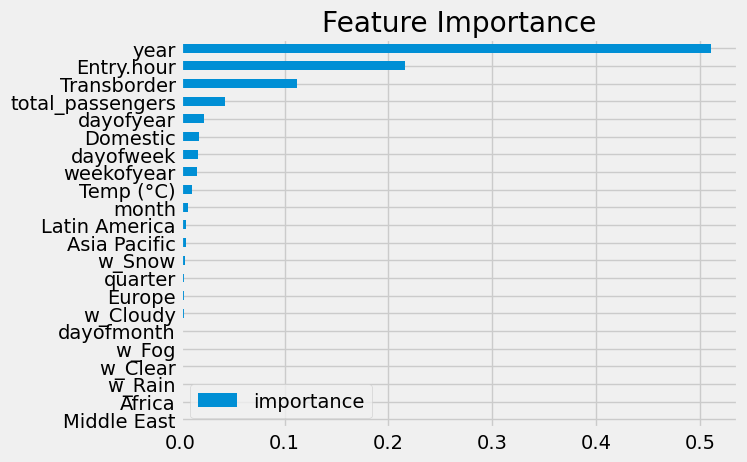

In [35]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

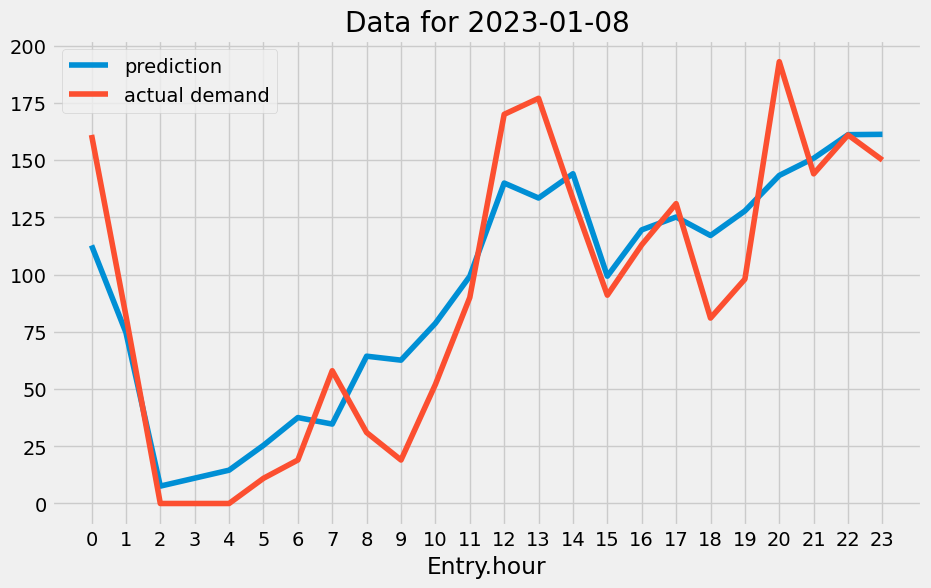

In [36]:


# Select the specific date to filter on
selected_date = '2023-01-08'


# Filter the dataframes on the selected date
a_filtered = a.loc[selected_date]
b_filtered = b.loc[selected_date]

plt.figure(figsize=(10, 6))

# Plot the two lines
plt.plot(a_filtered.index, a_filtered.values, label='prediction')
plt.plot(b_filtered.index, b_filtered.values, label='actual demand')

# Set the x-axis label and title
plt.xlabel('Entry.hour')
plt.title(f'Data for {selected_date}')

plt.xticks(range(24))
plt.legend()
plt.show()


In [37]:
mean_squared_error(y_true=test['TaxiCount'], y_pred=test['pred'])

451.5667751980002

In [38]:
y_true = test['TaxiCount']
y_mean = train['TaxiCount'].mean()
y_pred = [y_mean] * len(y_true)
mse_baseline = mean_squared_error(y_true, y_pred)
print('MSE of baseline model:', mse_baseline)

MSE of baseline model: 2624.372589122404


# this is not bad but i wanna explore more 
next i will try decision tree and Random forest 

In [39]:
print(yvr2.columns)

Index(['Entry.hour', 'TaxiCount', 'taximinwait', 'ride.count', 'Transborder',
       'Domestic', 'Latin America', 'Asia Pacific', 'Europe', 'Middle East',
       'Africa', 'total_passengers', 'Temp (°C)', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'w_Clear',
       'w_Cloudy', 'w_Fog', 'w_Rain', 'w_Snow'],
      dtype='object')


In [98]:
X = yvr2[['Entry.hour', 'Transborder', 'Domestic', 'Latin America', 'Asia Pacific', 'Europe', 'Middle East', 'Africa', 'total_passengers', 'Temp (°C)', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'w_Clear', 'w_Cloudy', 'w_Fog', 'w_Rain', 'w_Snow']]
Y = yvr2['TaxiCount']


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.05,random_state = 2023)

In [42]:
tree_1 = tree.DecisionTreeClassifier(random_state=2021)
param = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]}
cupcake = GridSearchCV(tree_1, param, cv=5, scoring='accuracy')
cupcake.fit(X_train, Y_train)
print("Best Parameters: ", cupcake.best_params_)
print("Best accuracy: ", cupcake.best_score_)

C:\Users\emads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters:  {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy:  0.14590977498150998


# was not able to run this cell took a while  


In [44]:


#rf = ensemble.RandomForestClassifier(random_state=2021)
#param_grid = {'n_estimators': [100, 200, 300],
              #'max_depth': [3, 5, None],
              #'min_samples_split': [2, 4, 6],
              #'min_samples_leaf': [1, 2, 4]}

#grid_search = GridSearchCV(rf, param, cv=2, scoring='accuracy')
#grid_search.fit(X_train, Y_train)
#print("Best Parameters: ", grid_search.best_params_)
#print("Best accuracy: ", grid_search.best_score_)

In [99]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y, test_size=0.05,random_state = 2023)

In [101]:
rf = ensemble.RandomForestClassifier(random_state=2021)
param = {'n_estimators': [1000],
         'max_depth': [3],
         'min_samples_split': [2, 4] 
        }

grid_search = GridSearchCV(rf, param, cv=2, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

C:\Users\emads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Parameters:  {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 1000}
Best accuracy:  0.13123002249319285


In [102]:
tree_1 = tree.DecisionTreeClassifier(random_state=2021)
param = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]}
cupcake = GridSearchCV(tree_1, param, cv=5, scoring='accuracy')
cupcake.fit(X_train, Y_train)
print("Best Parameters: ", cupcake.best_params_)
print("Best accuracy: ", cupcake.best_score_)

C:\Users\emads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy:  0.1398721178819971


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.05,random_state = 2023)

In [51]:
tree_1 = tree.DecisionTreeClassifier(random_state=2021)
param = {'max_depth': [ 9],
              'min_samples_split': [ 4],
              'min_samples_leaf': [2]}
cupcake.fit(X_train, Y_train)

C:\Users\emads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [52]:
yvr2test = yvr2.loc[(yvr.index >= '2023-01-01')]
#yvr2test.to_csv('YVRTest.csv')

In [76]:
yvr2test = yvr2test[['Entry.hour', 'Transborder', 'Domestic', 'Latin America', 'Asia Pacific', 'Europe', 'Middle East', 'Africa', 'total_passengers', 'Temp (°C)', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'w_Clear', 'w_Cloudy', 'w_Fog', 'w_Rain', 'w_Snow']]

In [66]:
yvr2test['prediction'] = cupcake.predict(yvr2test)

In [67]:
yvr2test['prediction'].head(10)

date
2023-01-01    65.0
2023-01-01    26.0
2023-01-01     6.0
2023-01-01     0.0
2023-01-01     0.0
2023-01-01    16.0
2023-01-01    24.0
2023-01-01    56.0
2023-01-01    21.0
2023-01-01    21.0
Name: prediction, dtype: float64

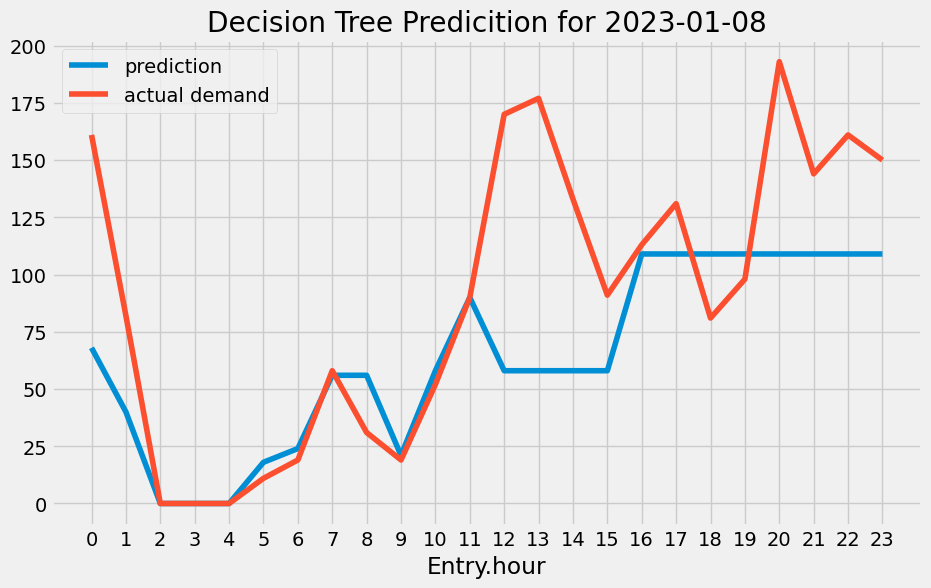

In [71]:
yvr2testTaxi = yvr2.loc[(yvr.index >= '2023-01-01')]
yvr2testTaxi = yvr2testTaxi[['Entry.hour','TaxiCount']]
#I merged the prediction column with the yvr2test in a seperate file
a = yvr2test.pivot_table(index = 'date', columns = 'Entry.hour', values='prediction' )
b = yvr2testTaxi.pivot_table(index = 'date', columns = 'Entry.hour', values='TaxiCount' )
# Select the specific date to filter on
selected_date = '2023-01-08'


# Filter the dataframes on the selected date
a_filtered = a.loc[selected_date]
b_filtered = b.loc[selected_date]

plt.figure(figsize=(10, 6))

# Plot the two lines
plt.plot(a_filtered.index, a_filtered.values, label='prediction')
plt.plot(b_filtered.index, b_filtered.values, label='actual demand')

# Set the x-axis label and title
plt.xlabel('Entry.hour')
plt.title(f'Decision Tree Predicition for {selected_date}')

plt.xticks(range(24))
plt.legend()
plt.show()


In [72]:
# its not good at all 

In [73]:
rf = ensemble.RandomForestClassifier(random_state=2021)
param = {'n_estimators': [1000],
         'max_depth': [3],
         'min_samples_split': [2, 4] 
        }

grid_search = GridSearchCV(rf, param, cv=2, scoring='accuracy')
grid_search.fit(X_train, Y_train)


C:\Users\emads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [3], 'min_samples_split': [2, 4],
                         'n_estimators': [1000]},
             scoring='accuracy')

In [77]:
prediction = grid_search.predict(yvr2test)


In [78]:
prediction

array([ 0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0., 64., 64., 64.,
       64.,  0., 78.,  0.,  0., 64., 64., 64., 64., 64., 64.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 64., 64., 64., 64., 64., 64., 64.,  0.,
       64., 68.,  0., 64., 68., 64., 64., 64.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 64., 64., 64., 64., 68.,  0., 64., 68.,
       68., 64., 64., 64., 64., 64., 64.,  0.,  0.,  0.,  0.,  0.,  0.,
       12., 64.,  0., 38., 64., 64., 64., 68.,  0., 64.,  0., 68., 64.,
       64., 64., 64., 64., 64.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,
        0., 64., 64., 64., 64.,  0.,  0.,  0., 64., 68., 64., 64., 64.,
       64., 64.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14., 64., 64., 38.,
       64., 64., 64.,  0., 64.,  0., 64.,  0., 64., 64., 64., 64., 64.,
       64.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 64.,  0., 64., 64., 64.,
       64., 64.,  0., 64., 68.,  0., 64., 64., 64., 64., 64., 64.,  0.,
        0.,  0.,  0.,  0.,  0., 12., 64.,  0., 64., 64., 64., 64

In [ ]:
# this is too bad I wont even bother to visualize it 

In [79]:
yvr2

Entry.hour  TaxiCount  taximinwait  ride.count  Transborder  \
date                                                                      
2019-01-01           0      134.0     0.000000         0.0        221.0   
2019-01-01           1       86.0     0.000000         0.0          0.0   
2019-01-01           2        0.0     0.000000         0.0          0.0   
2019-01-01           3        0.0     0.000000         0.0          0.0   
2019-01-01           4       21.0    18.147143         0.0          0.0   
...                ...        ...          ...         ...          ...   
2023-01-31          19      149.0     0.000000        37.0        412.0   
2023-01-31          20       55.0     8.016000        62.0        380.0   
2023-01-31          21      118.0     0.000000        75.0        391.0   
2023-01-31          22      109.0     0.000000        30.0        789.0   
2023-01-31          23       88.0     0.000000         5.0        336.0   

            Domestic  Latin America  Asia Pacific  Europe  Middle East  ...  \
date                                                                    ...   
2019-01-01       3.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       3.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0            0.0           0.0     0.0          0.0  ...   
2019-01-01       0.0          160.0           0.0     0.0          0.0  ...   
...              ...            ...           ...     ...          ...  ...   
2023-01-31     939.0            0.0           0.0     0.0          0.0  ...   
2023-01-31    1157.0          169.0         358.0     0.0          0.0  ...   
2023-01-31    1268.0          169.0           0.0     0.0          0.0  ...   
2023-01-31     376.0          454.0           0.0     0.0          0.0  ...   
2023-01-31      66.0          294.0           0.0     0.0          0.0  ...   

            month  year  dayofyear  dayofmonth  weekofyear  w_Clear  w_Cloudy  \
date                                                                            
2019-01-01      1  2019          1           1           1        0         1   
2019-01-01      1  2019          1           1           1        0         1   
2019-01-01      1  2019          1           1           1        0         1   
2019-01-01      1  2019          1           1           1        0         1   
2019-01-01      1  2019          1           1           1        0         1   
...           ...   ...        ...         ...         ...      ...       ...   
2023-01-31      1  2023         31          31           5        0         1   
2023-01-31      1  2023         31          31           5        0         0   
2023-01-31      1  2023         31          31           5        0         0   
2023-01-31      1  2023         31          31           5        0         0   
2023-01-31      1  2023         31          31           5        0         0   

            w_Fog  w_Rain  w_Snow  
date                               
2019-01-01      0       0       0  
2019-01-01      0       0       0  
2019-01-01      0       0       0  
2019-01-01      0       0       0  
2019-01-01      0       0       0  
...           ...     ...     ...  
2023-01-31      0       0       0  
2023-01-31      0       0       1  
2023-01-31      0       0       1  
2023-01-31      0       0       1  
2023-01-31      0       0       1  

[17784 rows x 25 columns]

# my 4th model would be a randomforest resgressor 

In [81]:
yvr2['TaxiCount_lag1'] = yvr2['TaxiCount'].shift(24) # 1 day lag (24 hours)
yvr2['TaxiCount_lag2'] = yvr2['TaxiCount'].shift(48) # 2 days lag (48 hours)
yvr2['TaxiCount_lag1']=yvr2['TaxiCount_lag1']. fillna(0)
yvr2['TaxiCount_lag2']=yvr2['TaxiCount_lag2']. fillna(0)

yvr2['TaxiCount_lag2'].isna().sum()

0

In [82]:
yvr2['total_passengers_lag1'] = yvr2['total_passengers'].shift(24) # 1 day lag (24 hours)
yvr2['total_passengers_lag2'] = yvr2['total_passengers'].shift(48) # 2 days lag (48 hours)
yvr2['total_passengers_lag1']=yvr2['total_passengers_lag1']. fillna(0)
yvr2['total_passengers_lag2']=yvr2['total_passengers_lag2']. fillna(0)

yvr2['total_passengers'].isna().sum()

0

In [83]:
train = yvr2.loc[yvr2.index < '2023-01-01'].reset_index()
test = yvr2.loc[yvr2.index >= '2023-01-01'].reset_index()
features = train.columns.drop(['TaxiCount', 'taximinwait', 'ride.count', 'date'])
target = 'TaxiCount'

In [84]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [97]:


# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=500,max_depth=3, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
test['pred']= rf.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 51.22863056067773


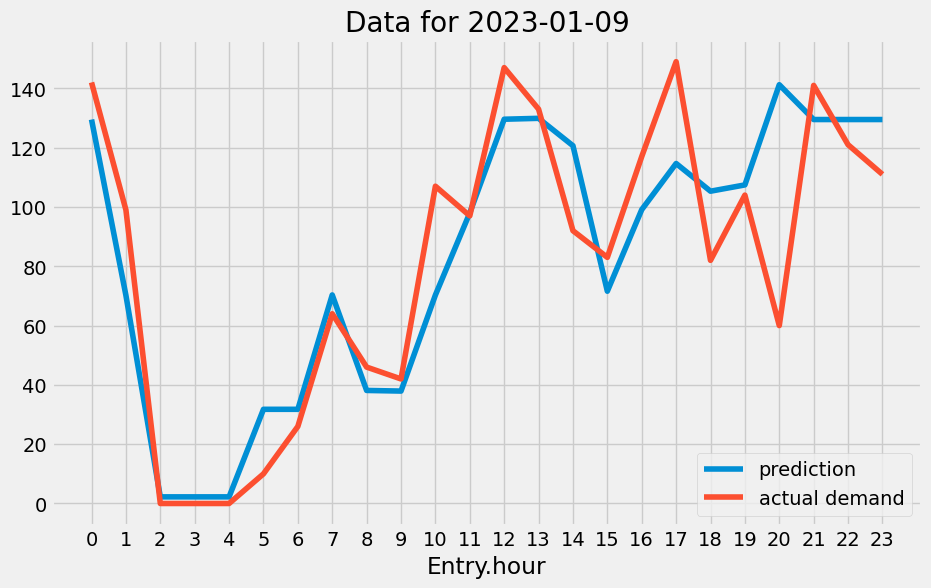

In [96]:
a = test.pivot_table(index = 'date', columns = 'Entry.hour', values='pred' )
b = test.pivot_table(index = 'date', columns = 'Entry.hour', values='TaxiCount' )

selected_date = '2023-01-09'


# Filter the dataframes on the selected date
a_filtered = a.loc[selected_date]
b_filtered = b.loc[selected_date]

plt.figure(figsize=(10, 6))

# Plot the two lines
plt.plot(a_filtered.index, a_filtered.values, label='prediction')
plt.plot(b_filtered.index, b_filtered.values, label='actual demand')

# Set the x-axis label and title
plt.xlabel('Entry.hour')
plt.title(f'Data for {selected_date}')

plt.xticks(range(24))
plt.legend()
plt.show()


considering that we have jsut 2years of data the accuracy is acceptablae
Although XGBoost model was promising we have decieded to pick the RFS as our model because. 